<a href="https://colab.research.google.com/github/aryaaupa/IDS-Project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns

# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_name = 'drive/MyDrive/UNSW_NB15_testing-set-data.csv'
df = pd.read_csv(file_name)
df.head()


Mounted at /content/drive


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,ftp,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,ftp,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,ftp,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,smtp,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [4]:
file_name = 'drive/MyDrive/student-data.csv'
df1 = pd.read_csv(file_name)
df1.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [5]:
file_name = 'drive/MyDrive/Test_data.csv'
df2 = pd.read_csv(file_name)
df2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [6]:
file_name = 'drive/MyDrive/UNSW_NB15_training-set.csv'
df3 = pd.read_csv(file_name)
df3.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [7]:
file_name = 'drive/MyDrive/Train_data.csv'
df4 = pd.read_csv(file_name)
df4.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])

print('Number of data points: ',df1.shape[0])
print('Number of features: ', df1.shape[1])

print('Number of data points: ',df2.shape[0])
print('Number of features: ', df2.shape[1])

print('Number of data points: ',df3.shape[0])
print('Number of features: ', df3.shape[1])

print('Number of data points: ',df4.shape[0])
print('Number of features: ', df4.shape[1])

Number of data points:  175341
Number of features:  45
Number of data points:  145
Number of features:  16
Number of data points:  22544
Number of features:  41
Number of data points:  82332
Number of features:  45
Number of data points:  25192
Number of features:  42


In [9]:
for index, value in df.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

for index, value in df1.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

for index, value in df2.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

for index, value in df3.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")

for index, value in df4.isnull().sum().iteritems():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")



In [10]:
print(f"Duplicate rows - {df.duplicated().sum()}")

print(f"Duplicate rows - {df1.duplicated().sum()}")

print(f"Duplicate rows - {df2.duplicated().sum()}")

print(f"Duplicate rows - {df3.duplicated().sum()}")

print(f"Duplicate rows - {df4.duplicated().sum()}")


Duplicate rows - 0
Duplicate rows - 0
Duplicate rows - 57
Duplicate rows - 0
Duplicate rows - 0


In [11]:
train=pd.read_csv('drive/MyDrive/UNSW_NB15_training-set.csv')
test=pd.read_csv('drive/MyDrive/UNSW_NB15_training-set.csv') #Need to check with Arya
train.head()
train.info()

train=pd.read_csv('drive/MyDrive/Train_data.csv')
test=pd.read_csv('drive/MyDrive/Test_data.csv') #Need to check with Arya
train.head()
train.info()


train=pd.read_csv('drive/MyDrive/student-data.csv')
test=pd.read_csv('drive/MyDrive/student-data.csv') #Need to check with Arya
train.head()
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [12]:
print(df.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)


Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
Index(['Unnamed: 0', 'Id', 'Student_Age', 'Sex', 'High_School_Type',
       'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urg

In [14]:
dist = df['attack_cat'].value_counts()
for name, count in dist.iteritems():
    print(f"Number of data points in attack category: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")




Number of data points in attack category:       Normal      is 56000 (31.938%)
Number of data points in attack category:      Generic      is 40000 (22.813%)
Number of data points in attack category:      Exploits     is 33393 (19.045%)
Number of data points in attack category:      Fuzzers      is 18184 (10.371%)
Number of data points in attack category:        DoS        is 12264 (6.994%)
Number of data points in attack category:   Reconnaissance  is 10491 (5.983%)
Number of data points in attack category:      Analysis     is 2000 (1.141%)
Number of data points in attack category:      Backdoor     is 1746 (0.996%)
Number of data points in attack category:     Shellcode     is 1133 (0.646%)
Number of data points in attack category:       Worms       is 130 (0.074%)


In [15]:
dist1 = df4['class'].value_counts()
for name, count in dist1.iteritems():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist1) * 100, 3)}%)")

Number of data points in class:       normal      is 13449 (53.386%)
Number of data points in class:      anomaly      is 11743 (46.614%)


In [16]:
dist2 = df1['Sex'].value_counts()
for name, count in dist2.iteritems():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist2) * 100, 3)}%)")

Number of data points in class:        Male       is 87 (60.0%)
Number of data points in class:       Female      is 58 (40.0%)


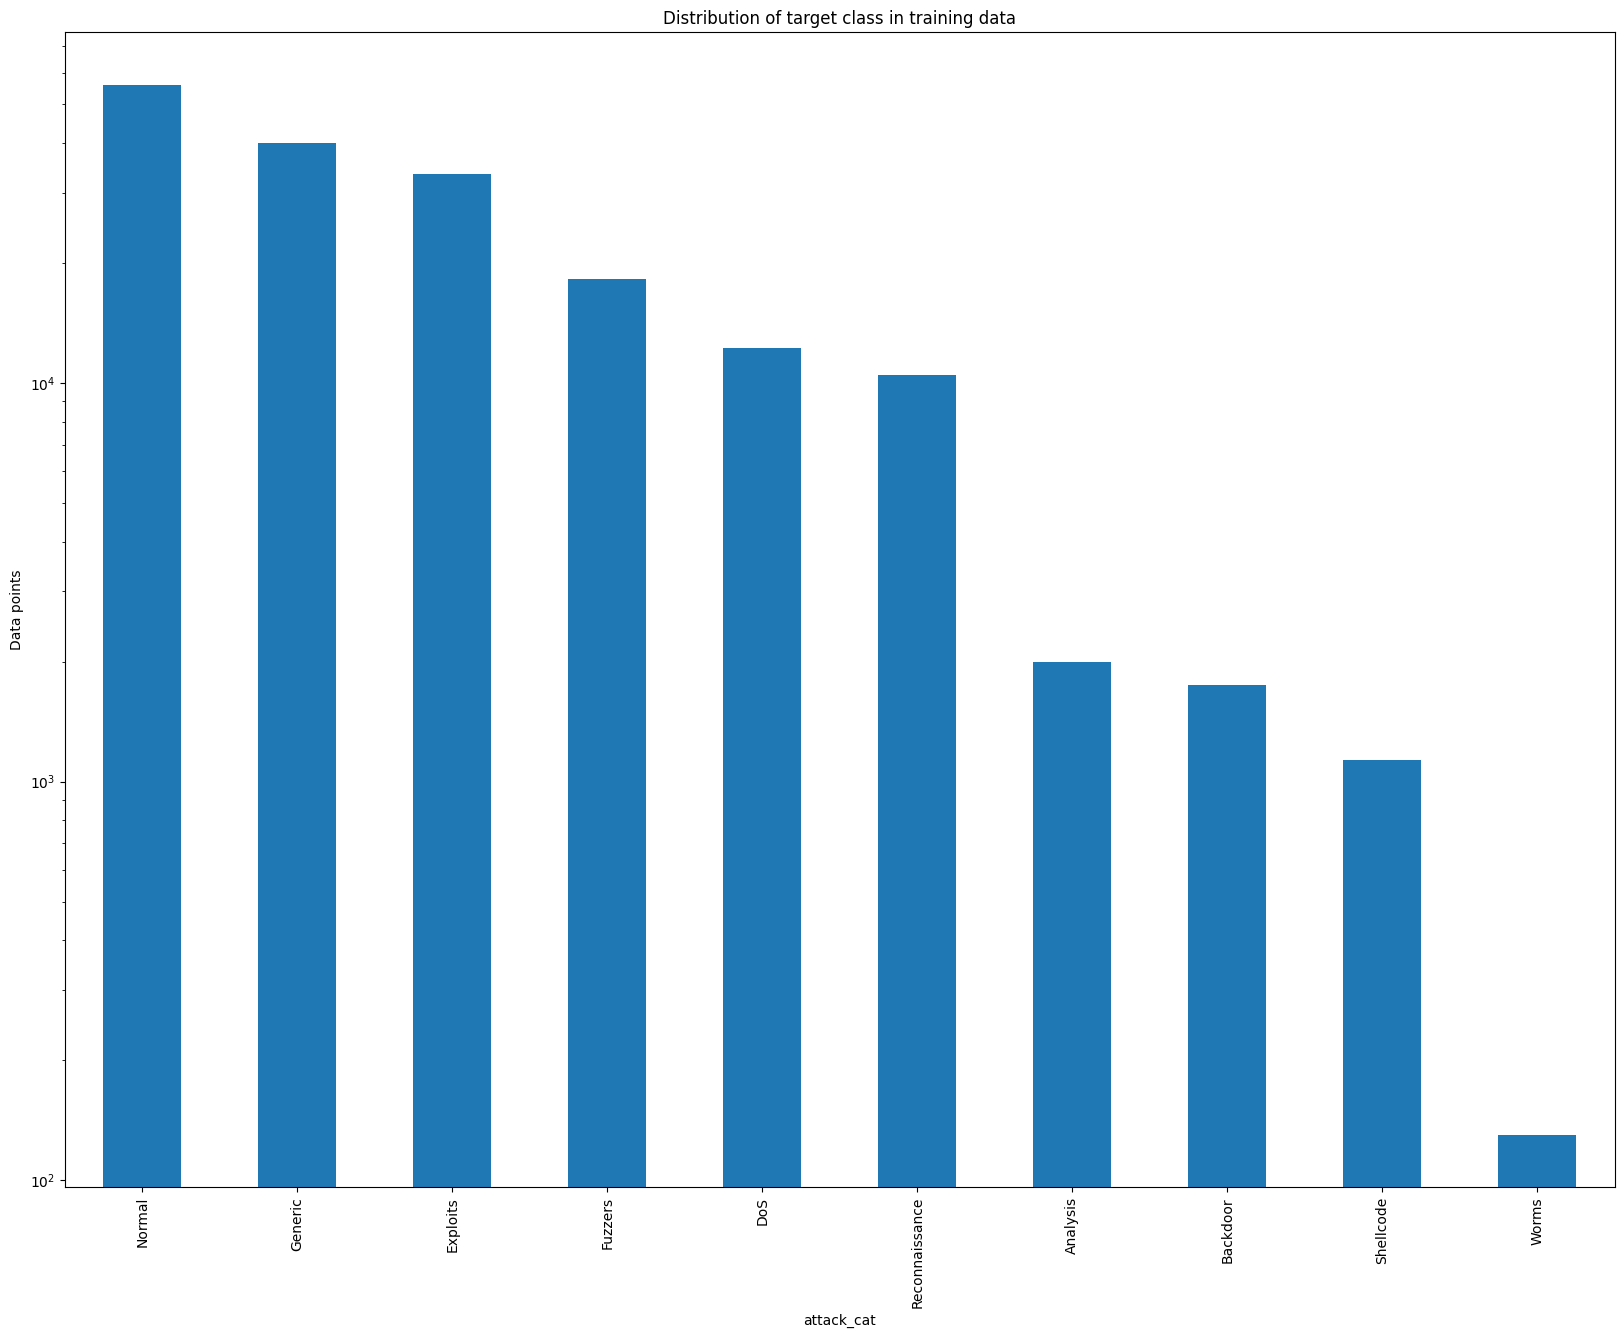

In [17]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()



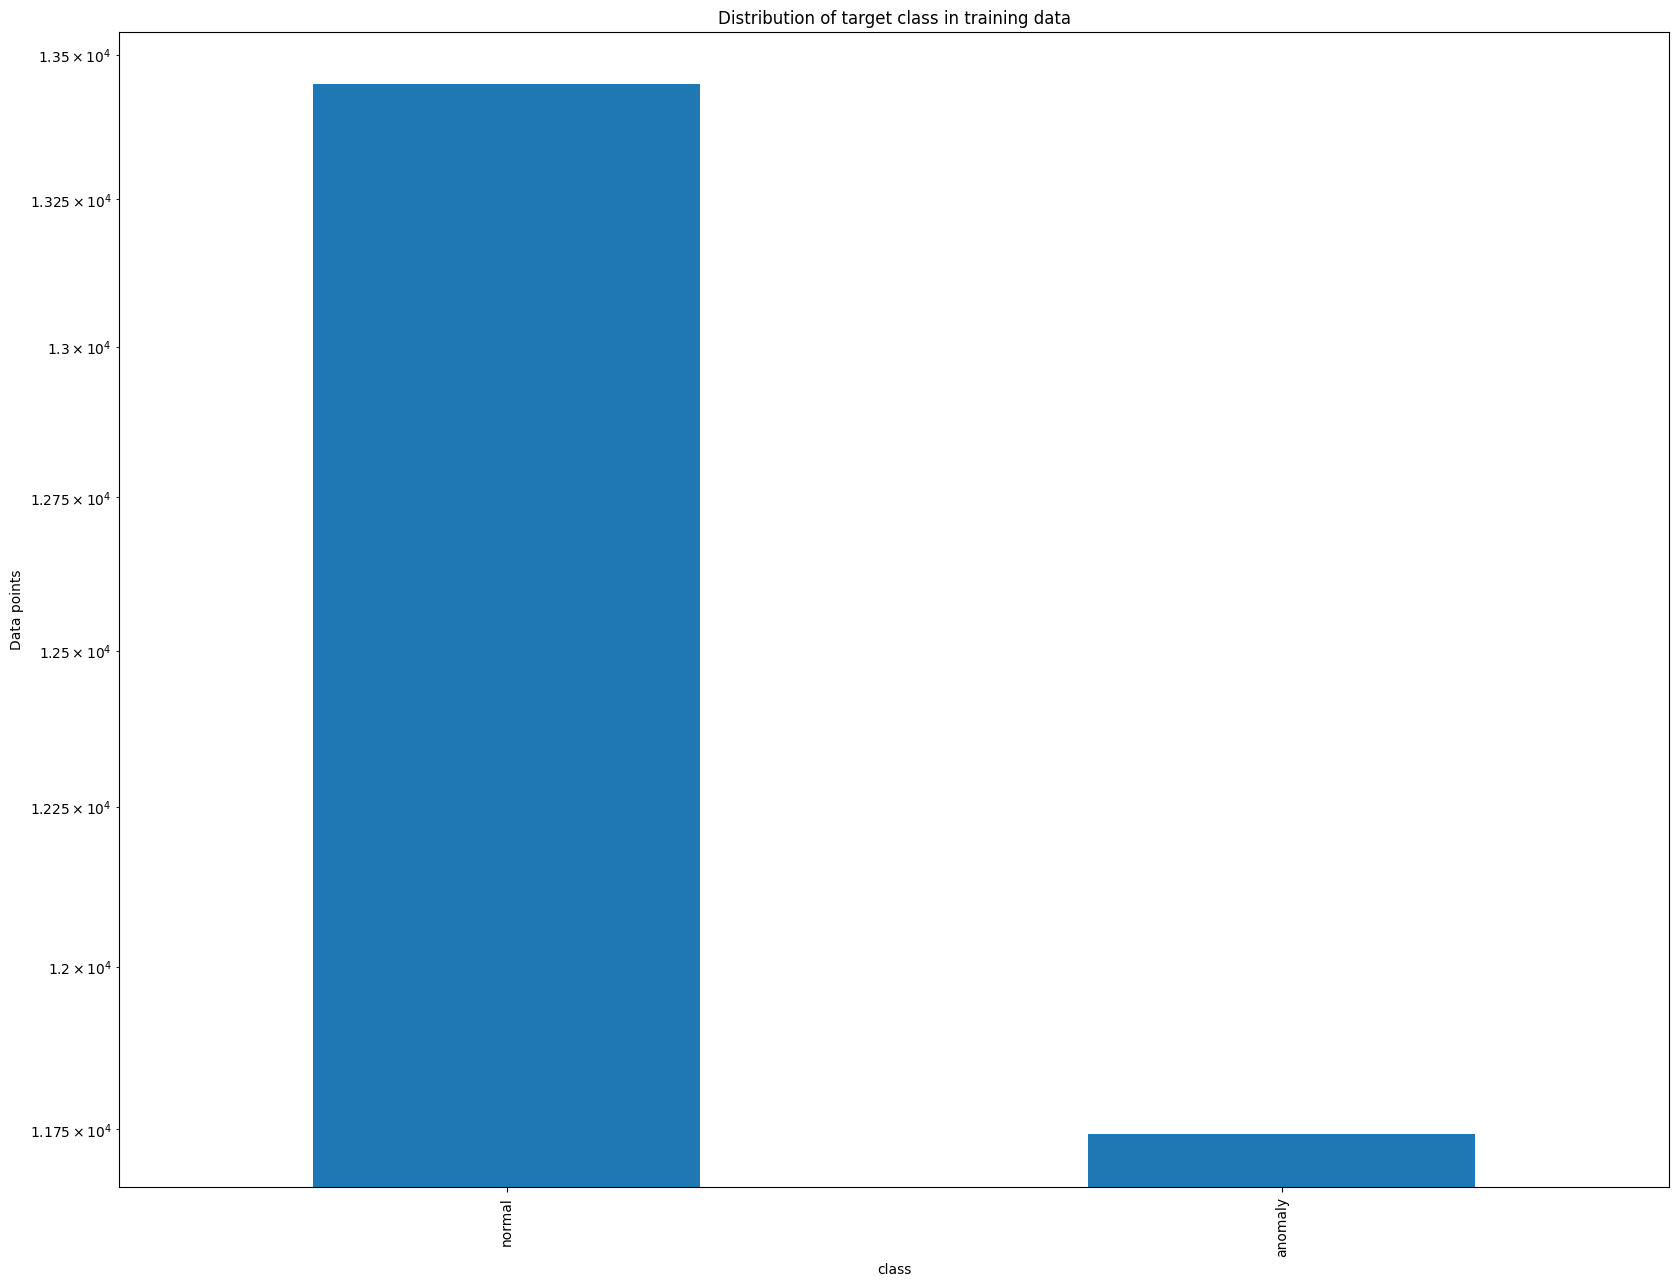

In [18]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist1.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()


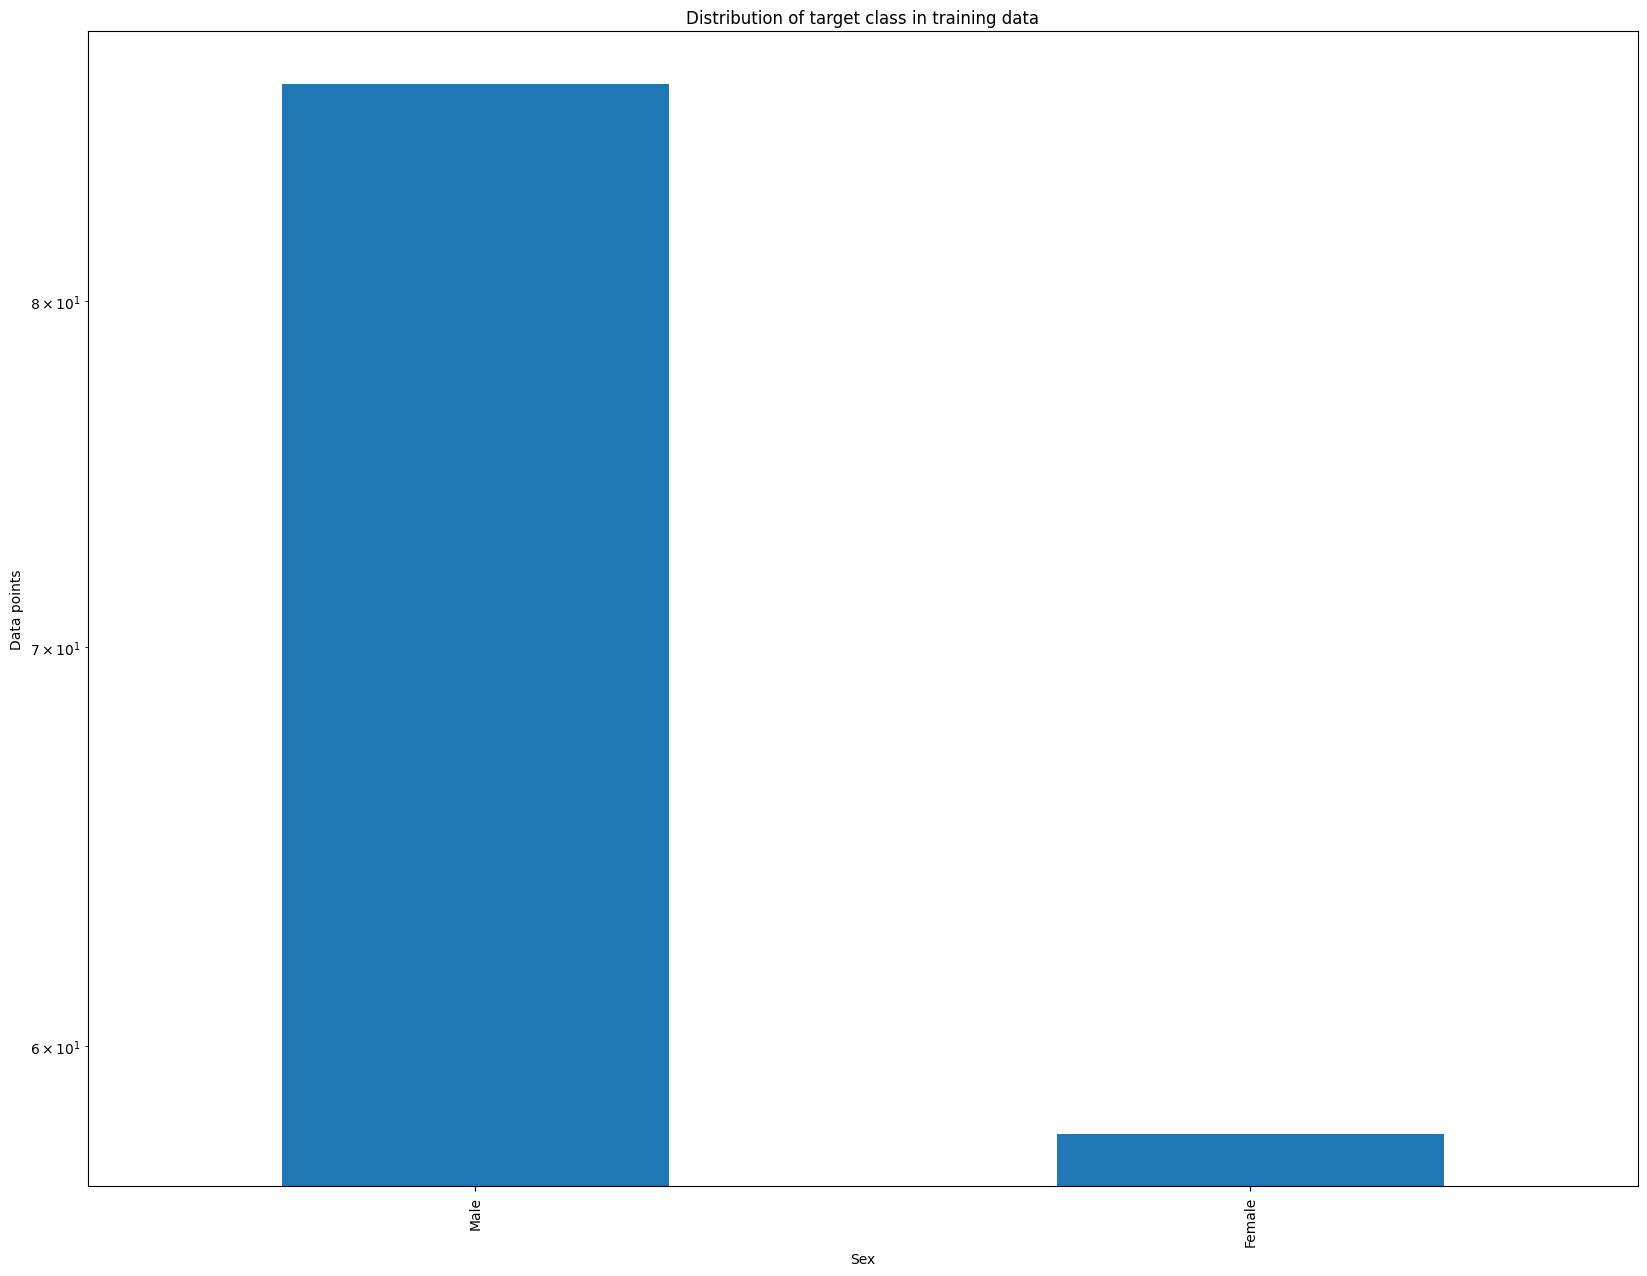

In [19]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist2.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Backdoor'),
  Text(2, 0, 'Analysis'),
  Text(3, 0, 'Fuzzers'),
  Text(4, 0, 'Shellcode'),
  Text(5, 0, 'Reconnaissance'),
  Text(6, 0, 'Exploits'),
  Text(7, 0, 'DoS'),
  Text(8, 0, 'Worms'),
  Text(9, 0, 'Generic')])

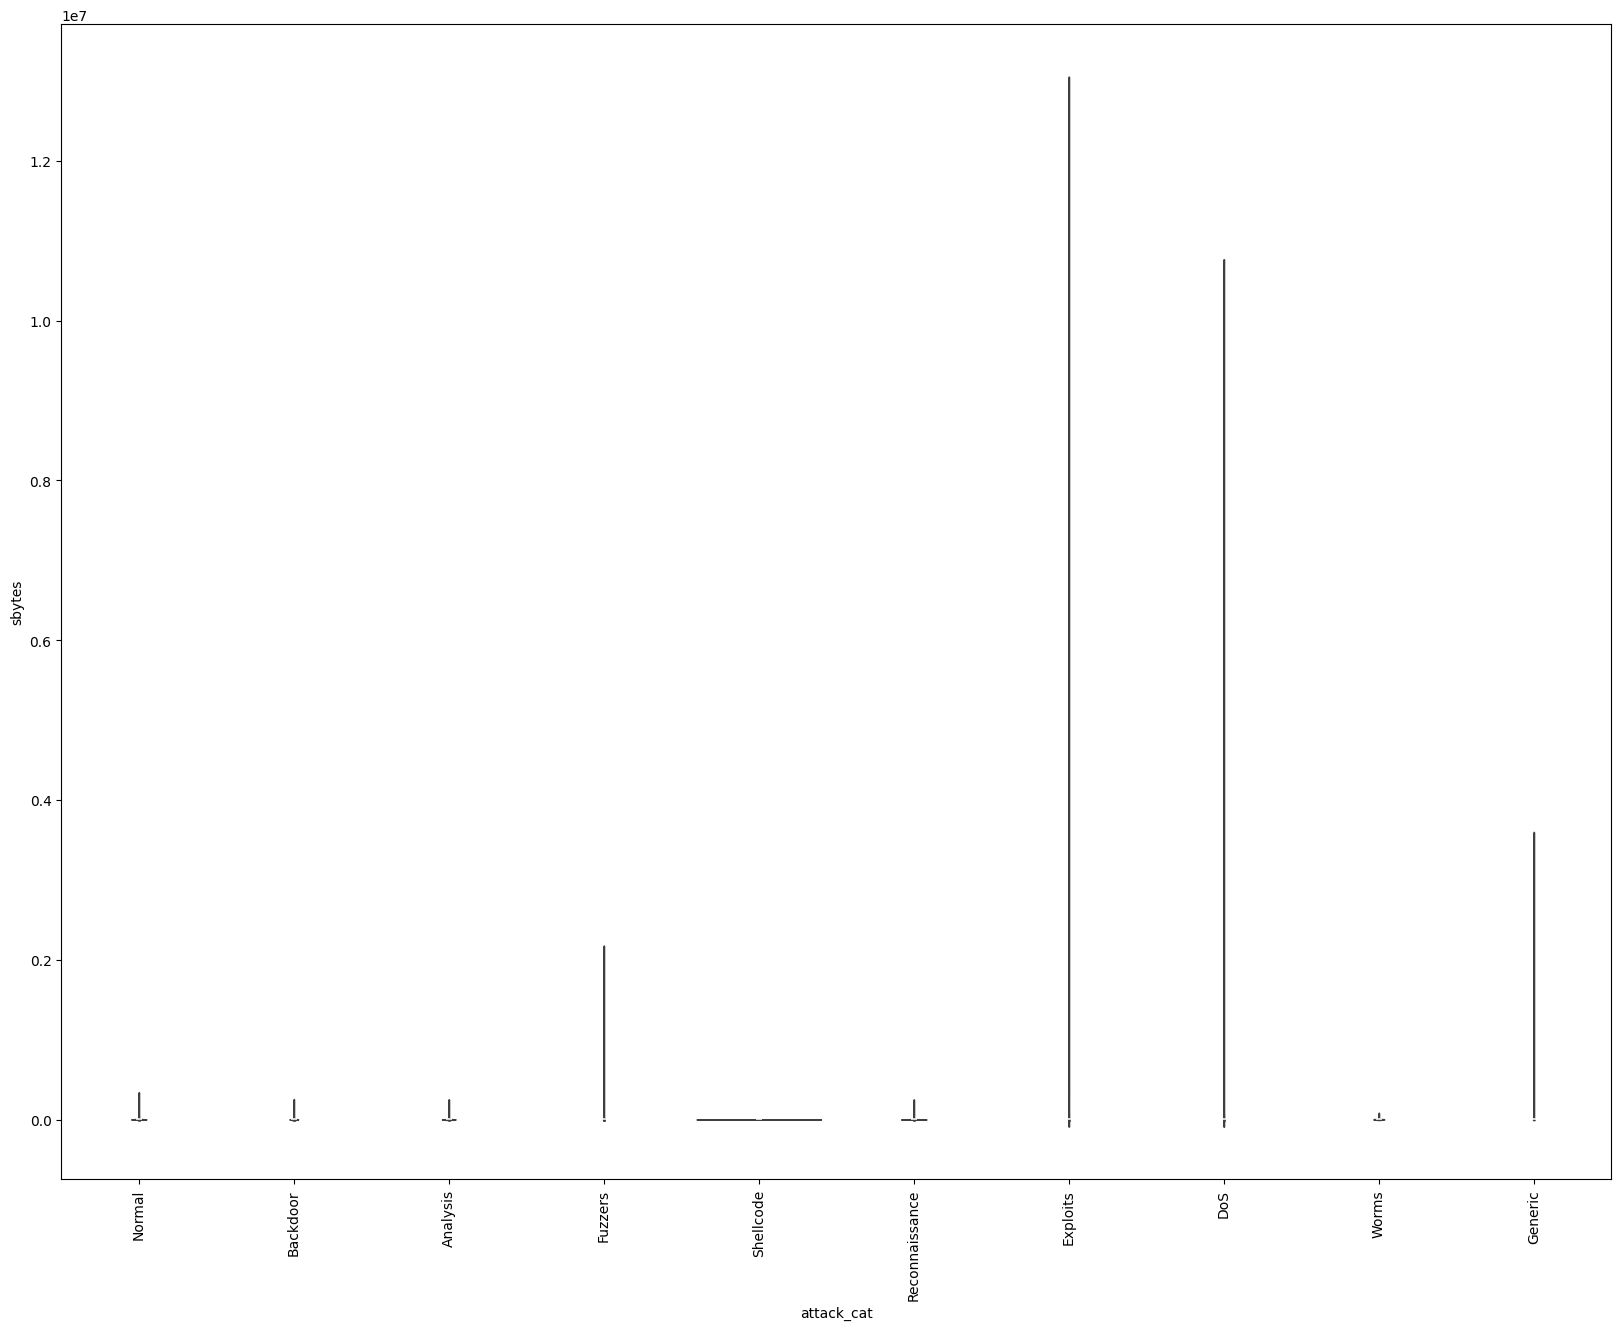

In [20]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="attack_cat", y="sbytes", data=df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'AA'),
  Text(1, 0, 'BA'),
  Text(2, 0, 'CC'),
  Text(3, 0, 'Fail'),
  Text(4, 0, 'BB'),
  Text(5, 0, 'CB'),
  Text(6, 0, 'DD'),
  Text(7, 0, 'DC')])

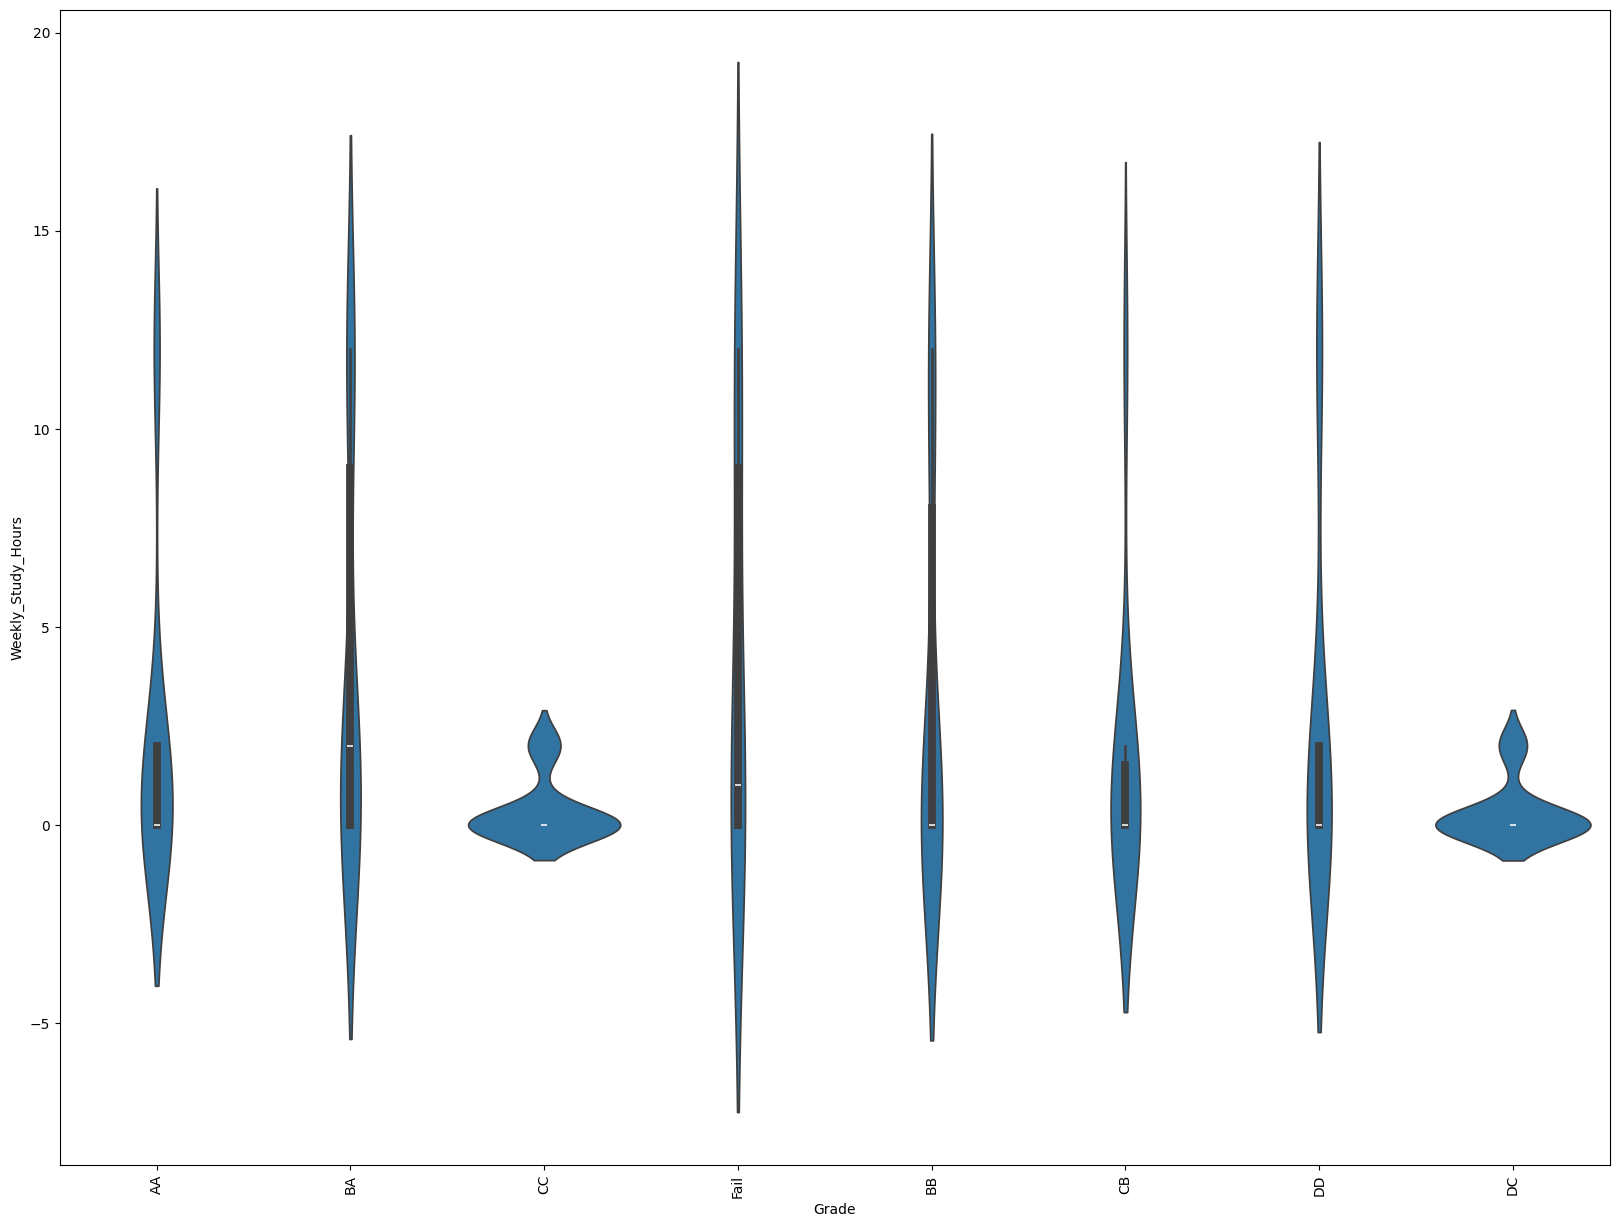

In [21]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="Grade", y="Weekly_Study_Hours", data=df1)
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'normal'), Text(1, 0, 'anomaly')])

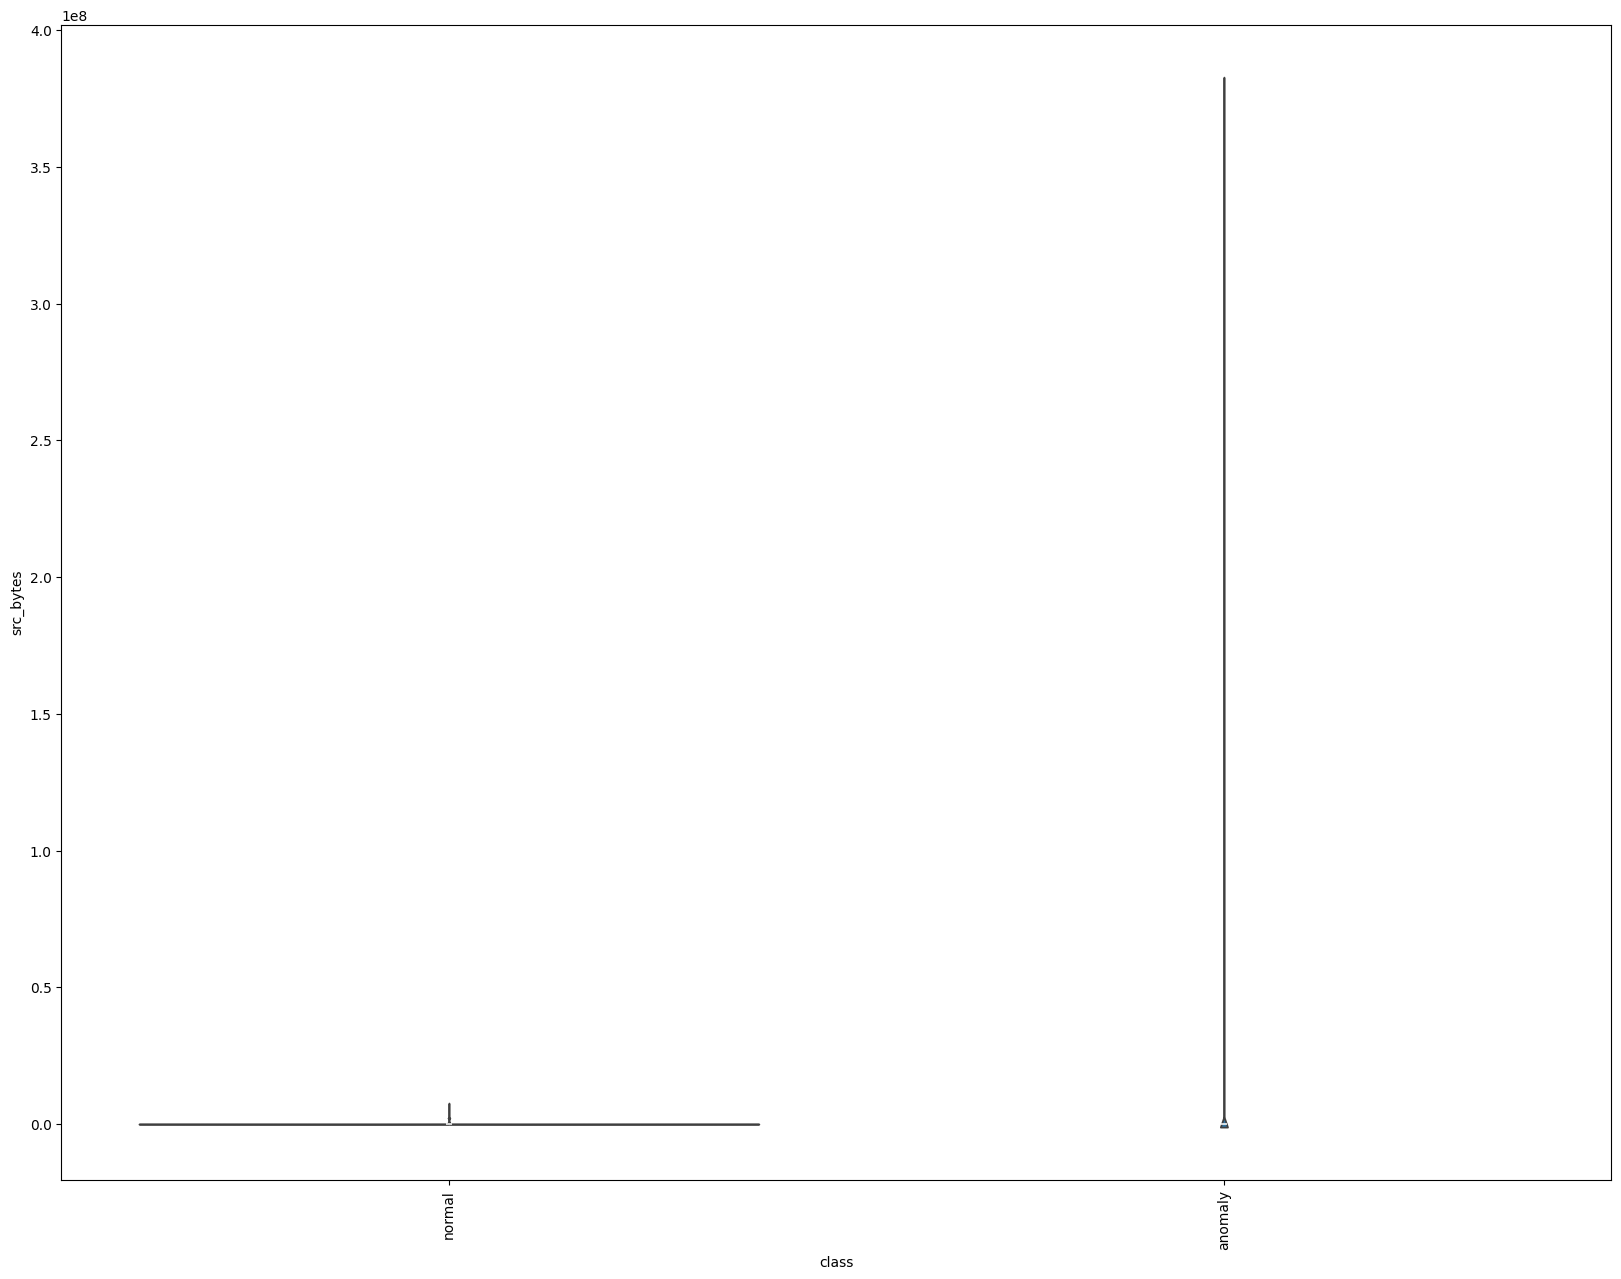

In [22]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="class", y="src_bytes",data=df4)
plt.xticks(rotation=90)

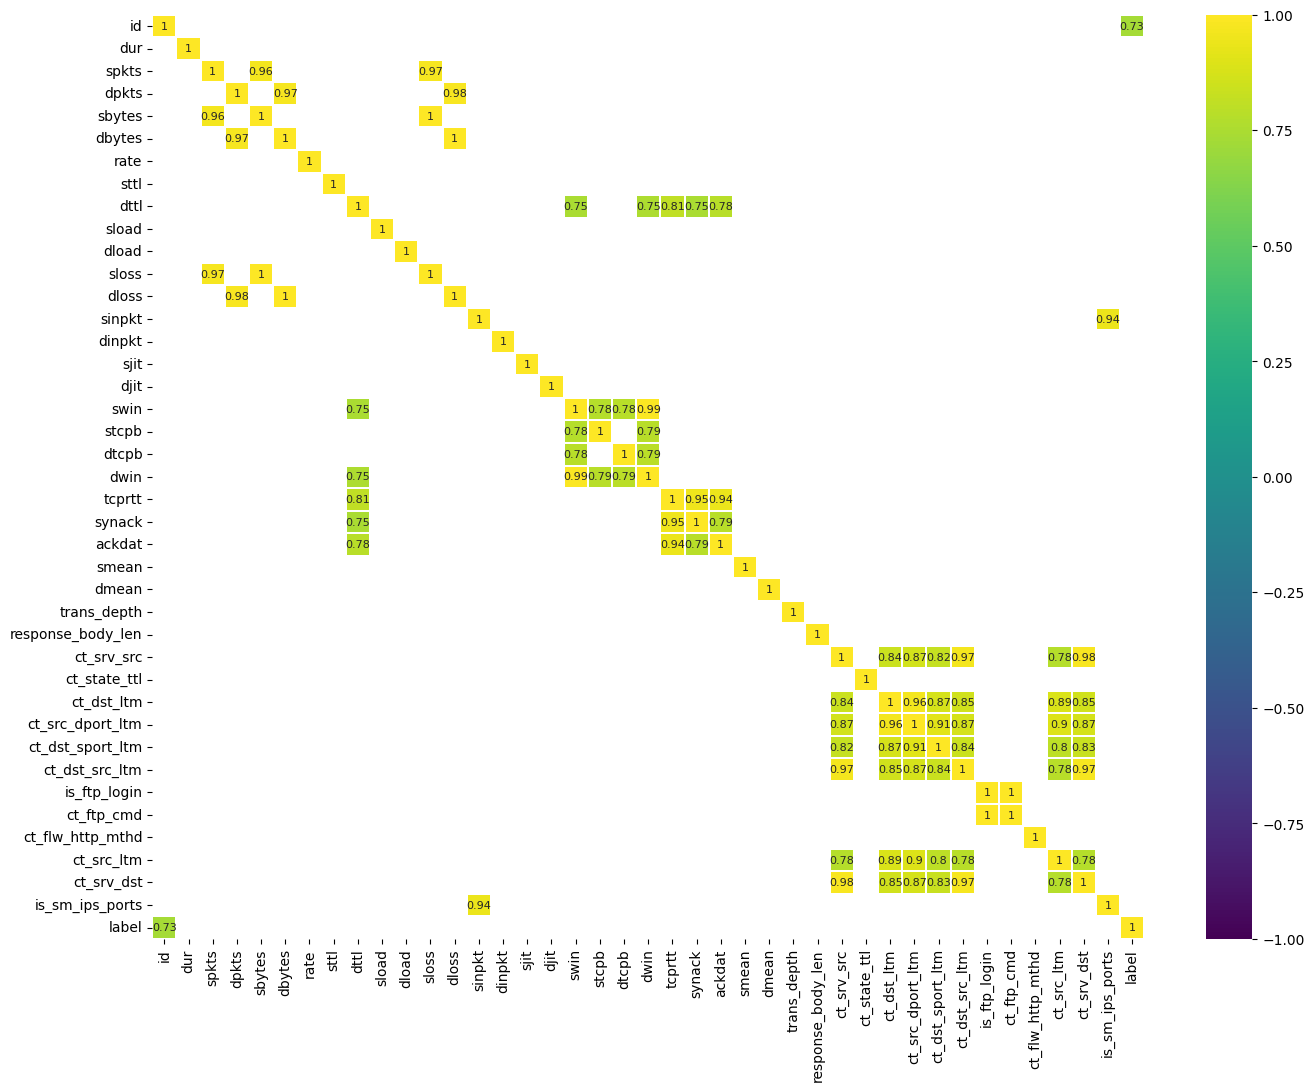

In [23]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

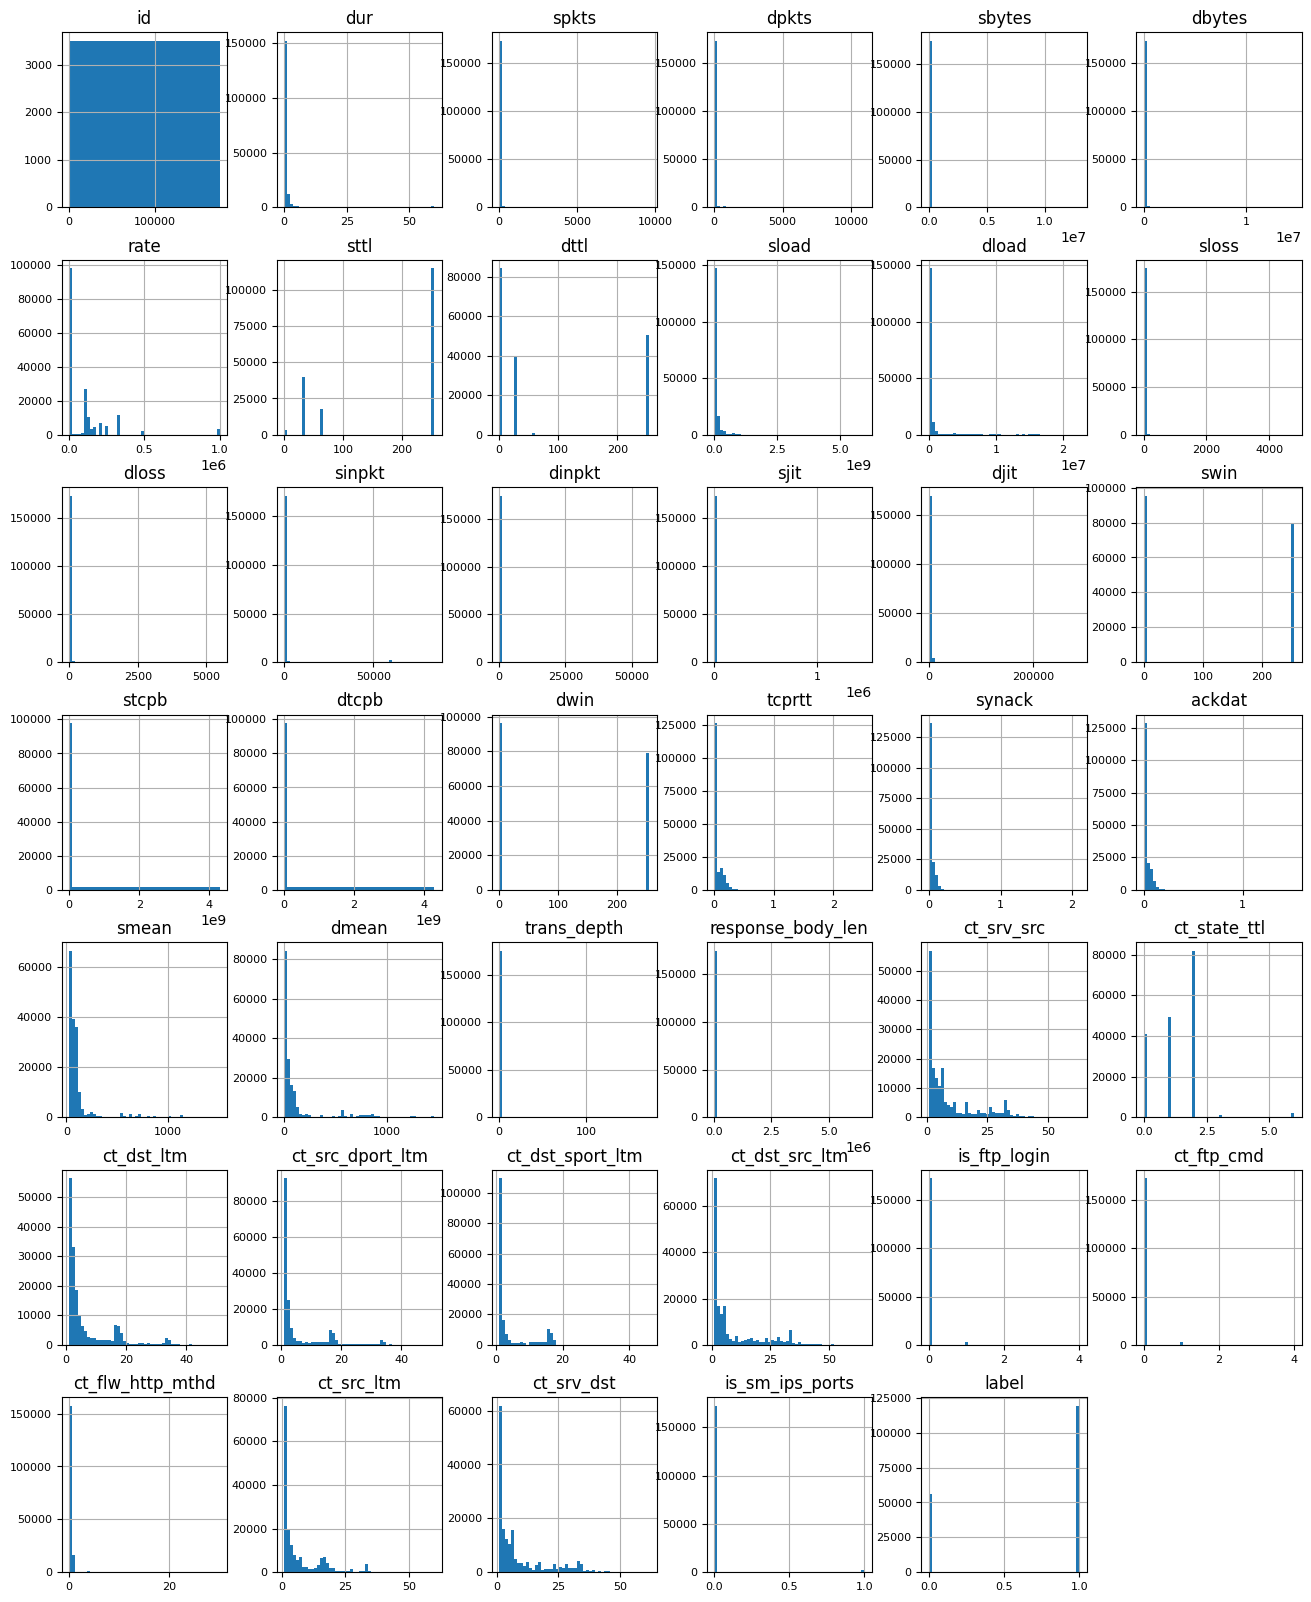

In [24]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

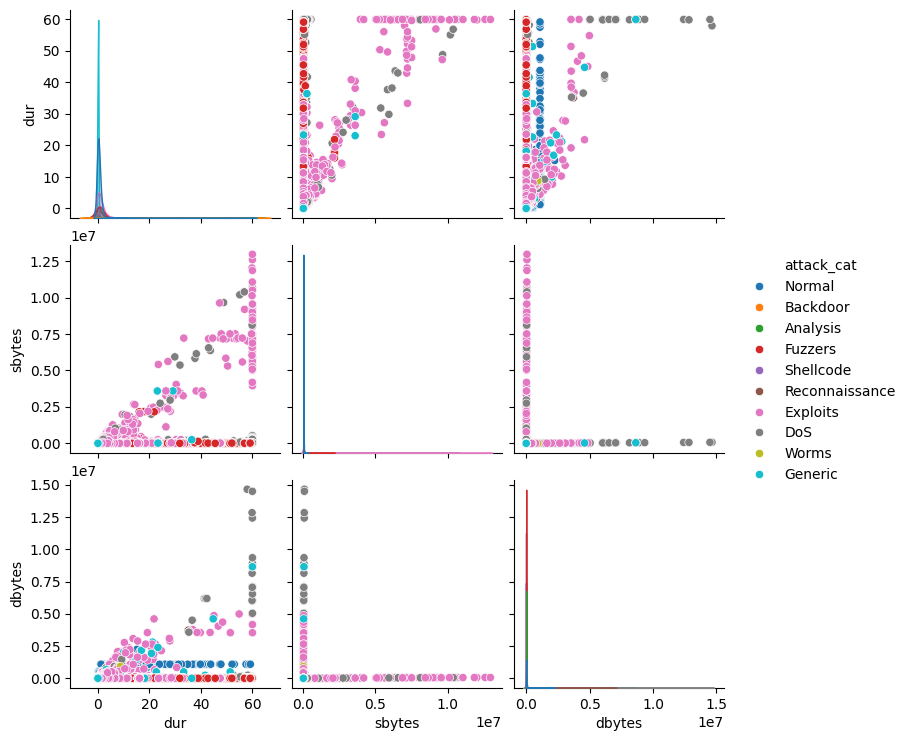

In [25]:
# Pair plots for bi-variate analyis
sns.pairplot(df, hue='attack_cat', vars=['dur', 'sbytes', 'dbytes'])

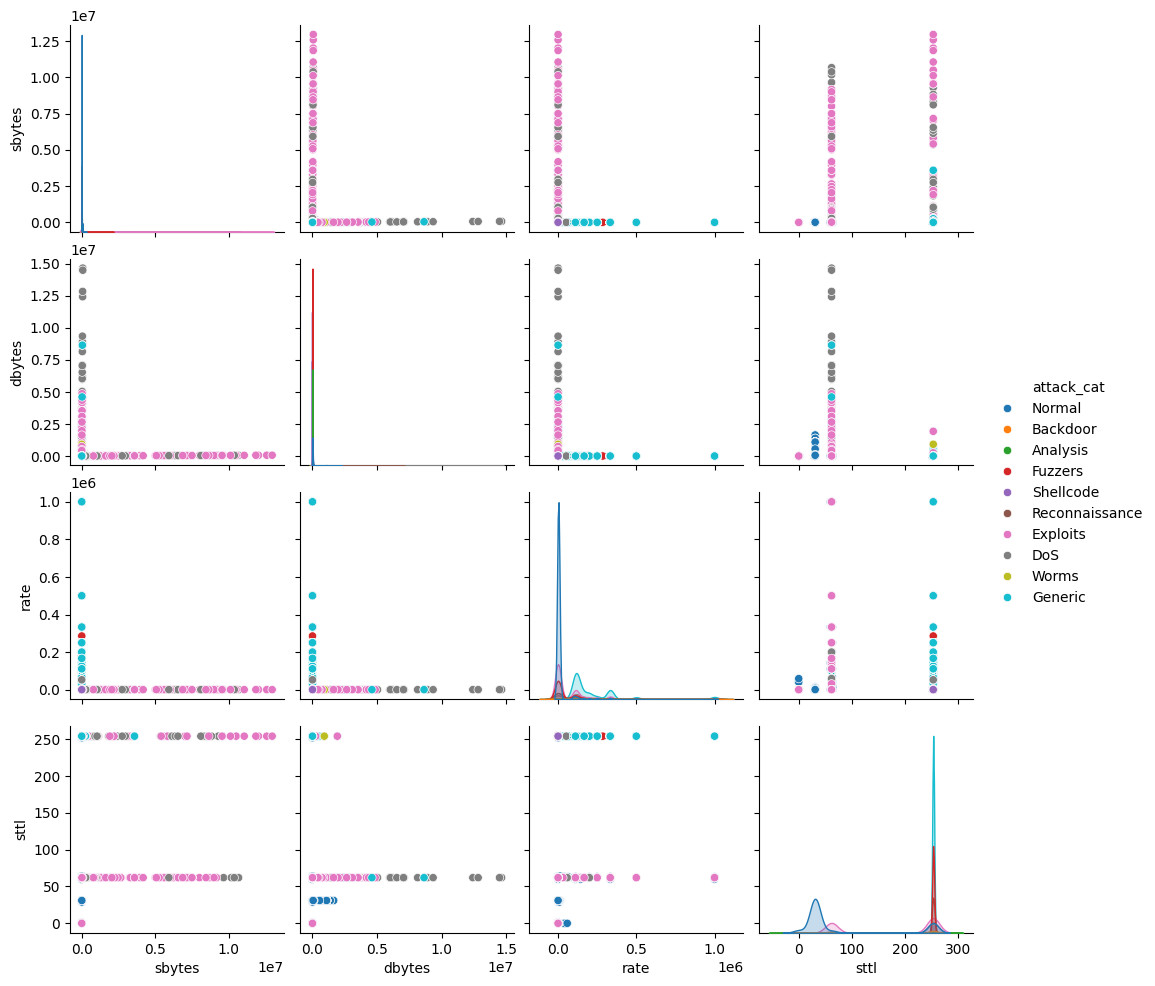

In [26]:
sns.pairplot(df, hue='attack_cat', vars=['sbytes', 'dbytes', 'rate', 'sttl'])


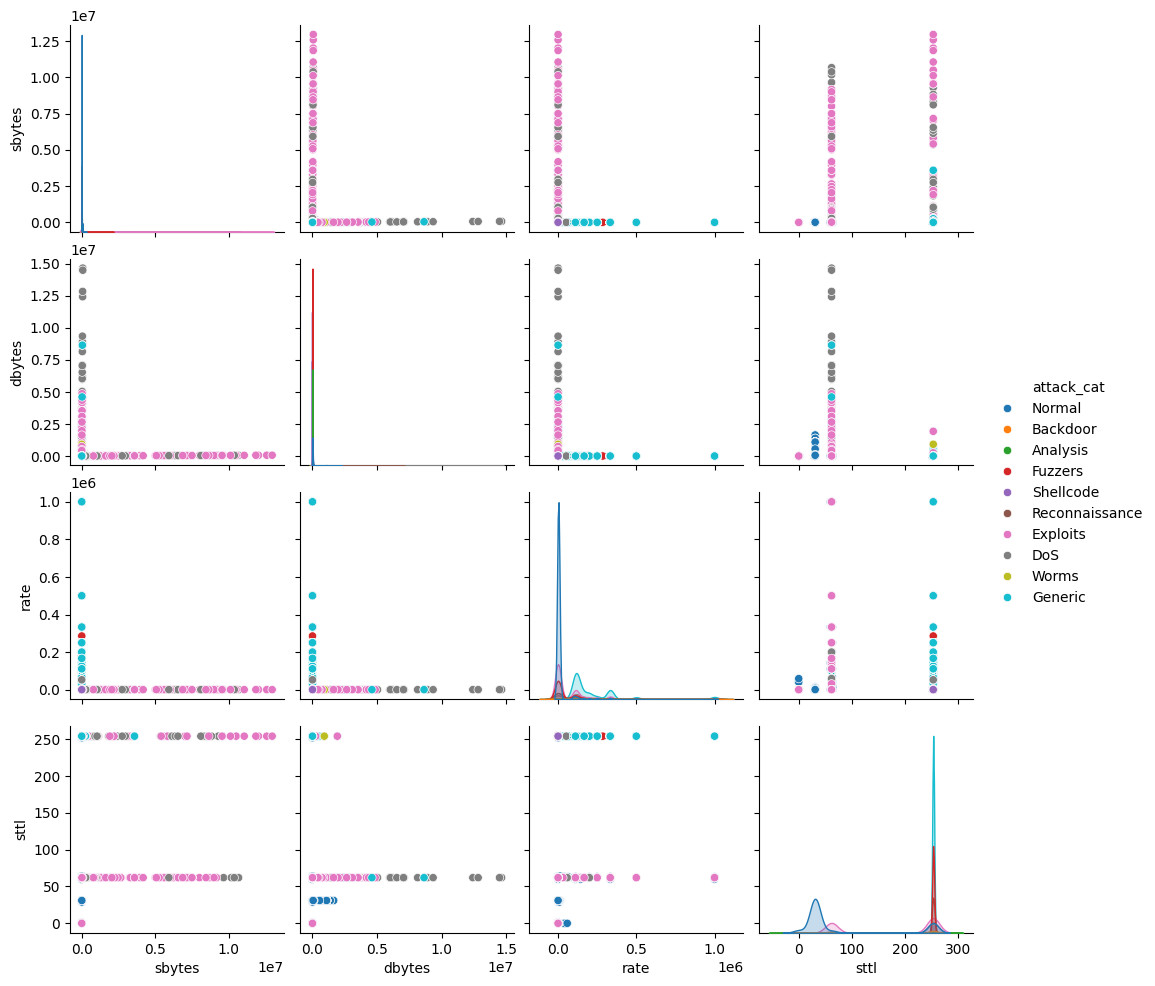

In [27]:
sns.pairplot(df, hue='attack_cat', vars=['sbytes', 'dbytes', 'rate', 'sttl'])


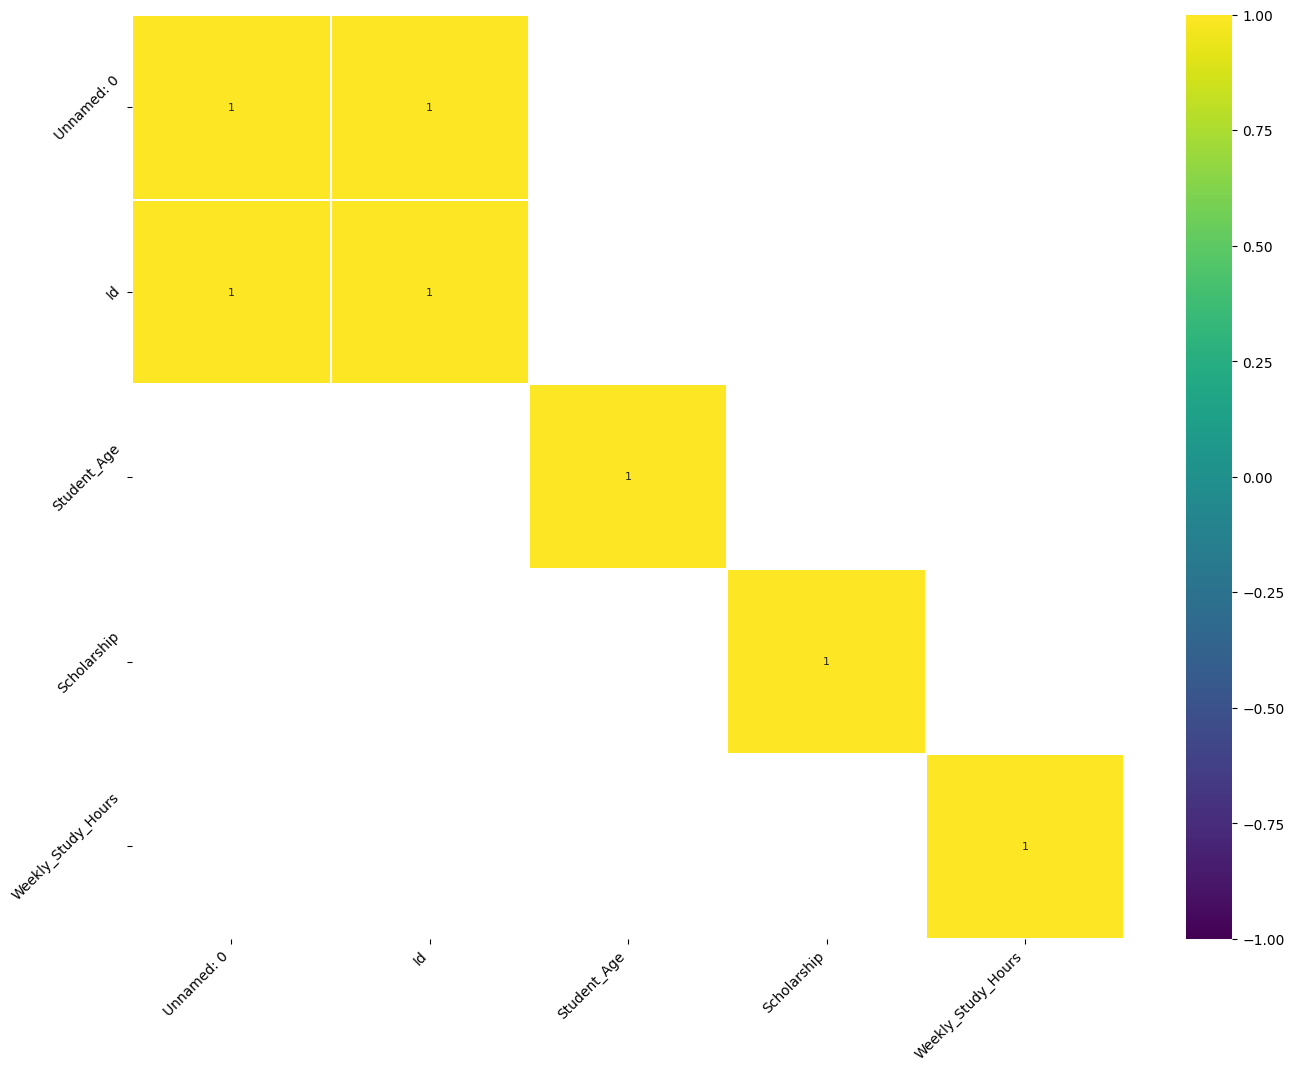

In [28]:
# Assuming df is your DataFrame and it's already loaded with the data
# Selecting only the numerical columns for correlation analysis
df_num1 = df1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = df_num1.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(16, 12))

# Generating a heatmap
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

# Optional: Adjust this line to better fit your column names if they are long or to improve readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.show()

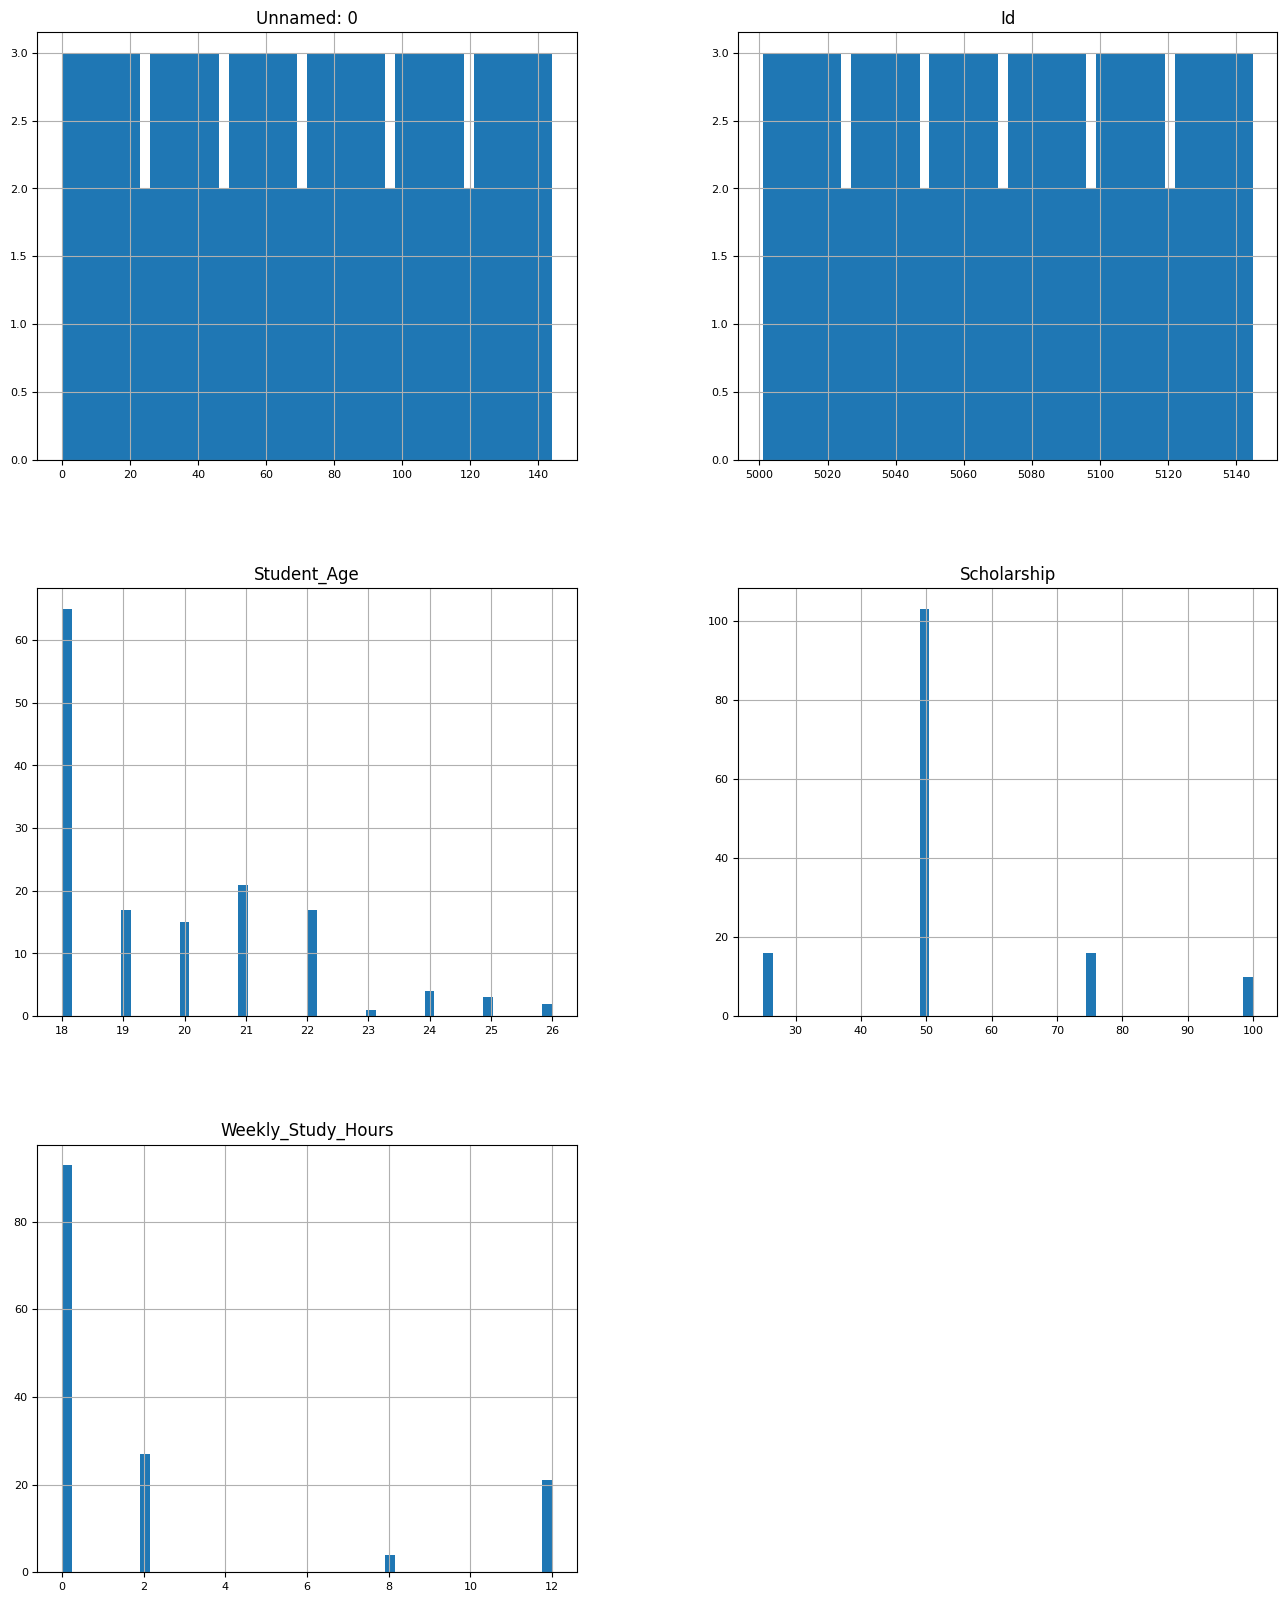

In [29]:
df_num1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

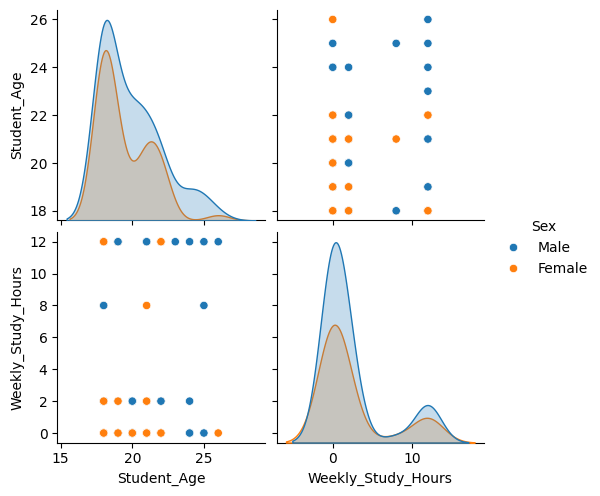

In [30]:
# Pair plots for bi-variate analyis
selected_columns = ['Student_Age', 'Weekly_Study_Hours', 'Attendance', 'Sex']

# Create a new DataFrame with only the selected columns
df_selected = df1[selected_columns]

# Create the pairplot, coloring by 'Sex'
sns.pairplot(df_selected, hue='Sex')

# Display the plot
plt.show()


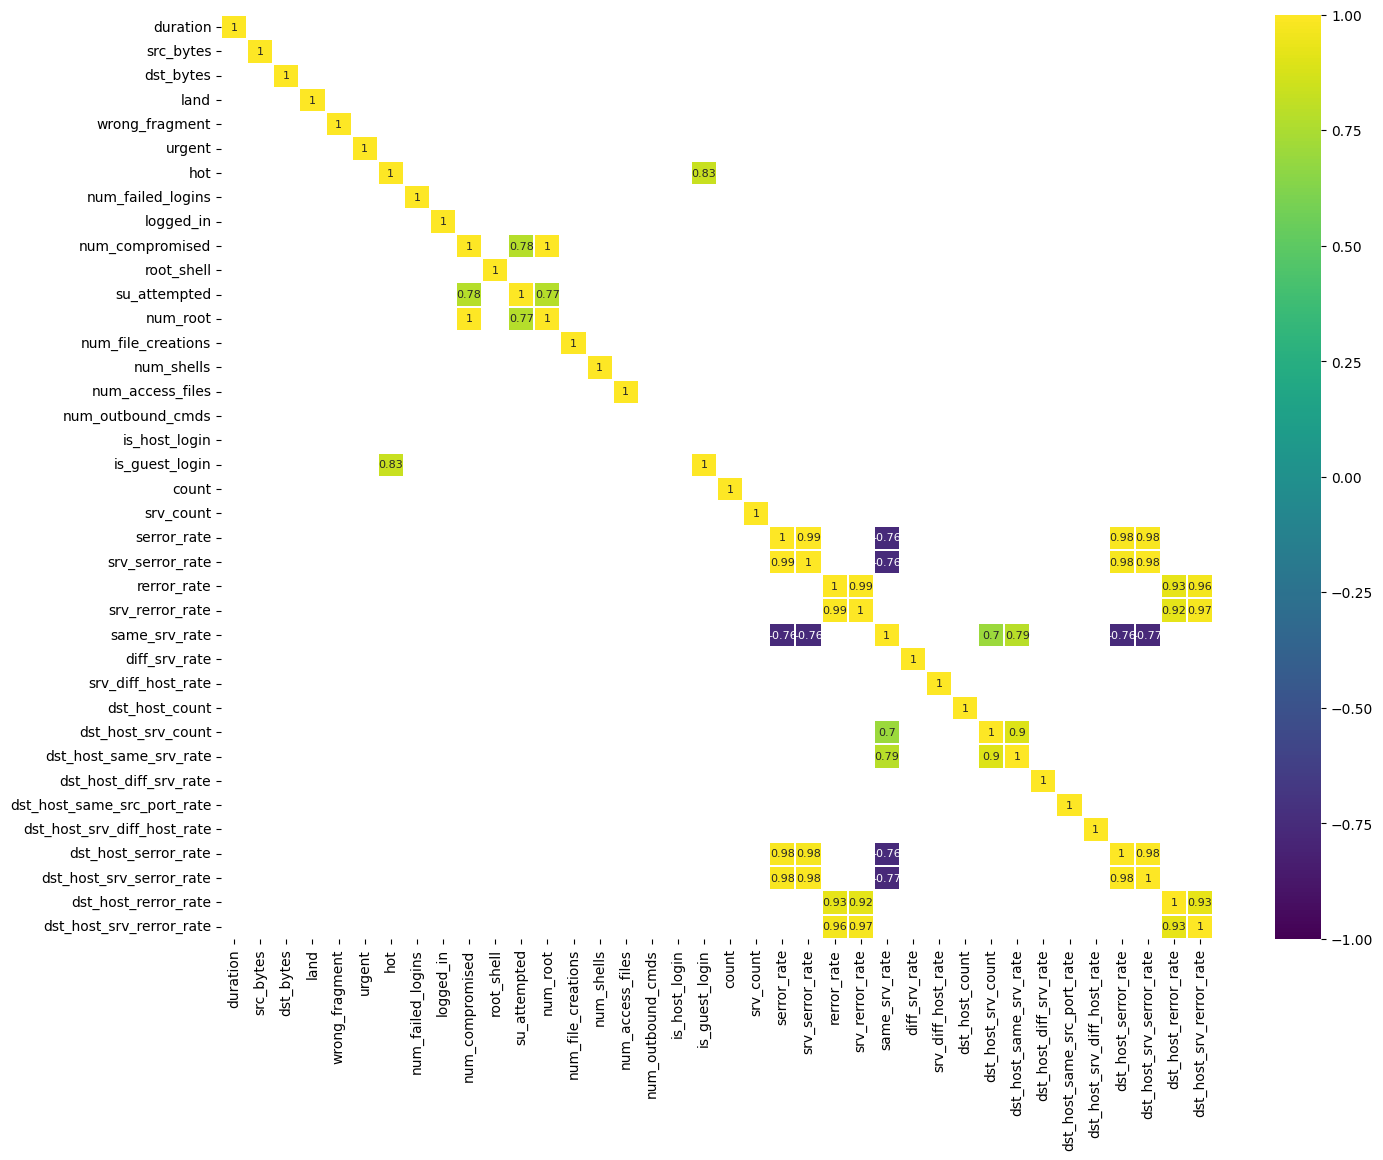

In [31]:
# Assuming 'df' is your DataFrame and it's already loaded with the data
# Selecting only the numerical columns for correlation analysis
# This explicitly excludes categorical columns by name if they are encoded as integers but represent categories
df_num2 = df4.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = df_num2.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(16, 12))

# Generating a heatmap
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

plt.show()


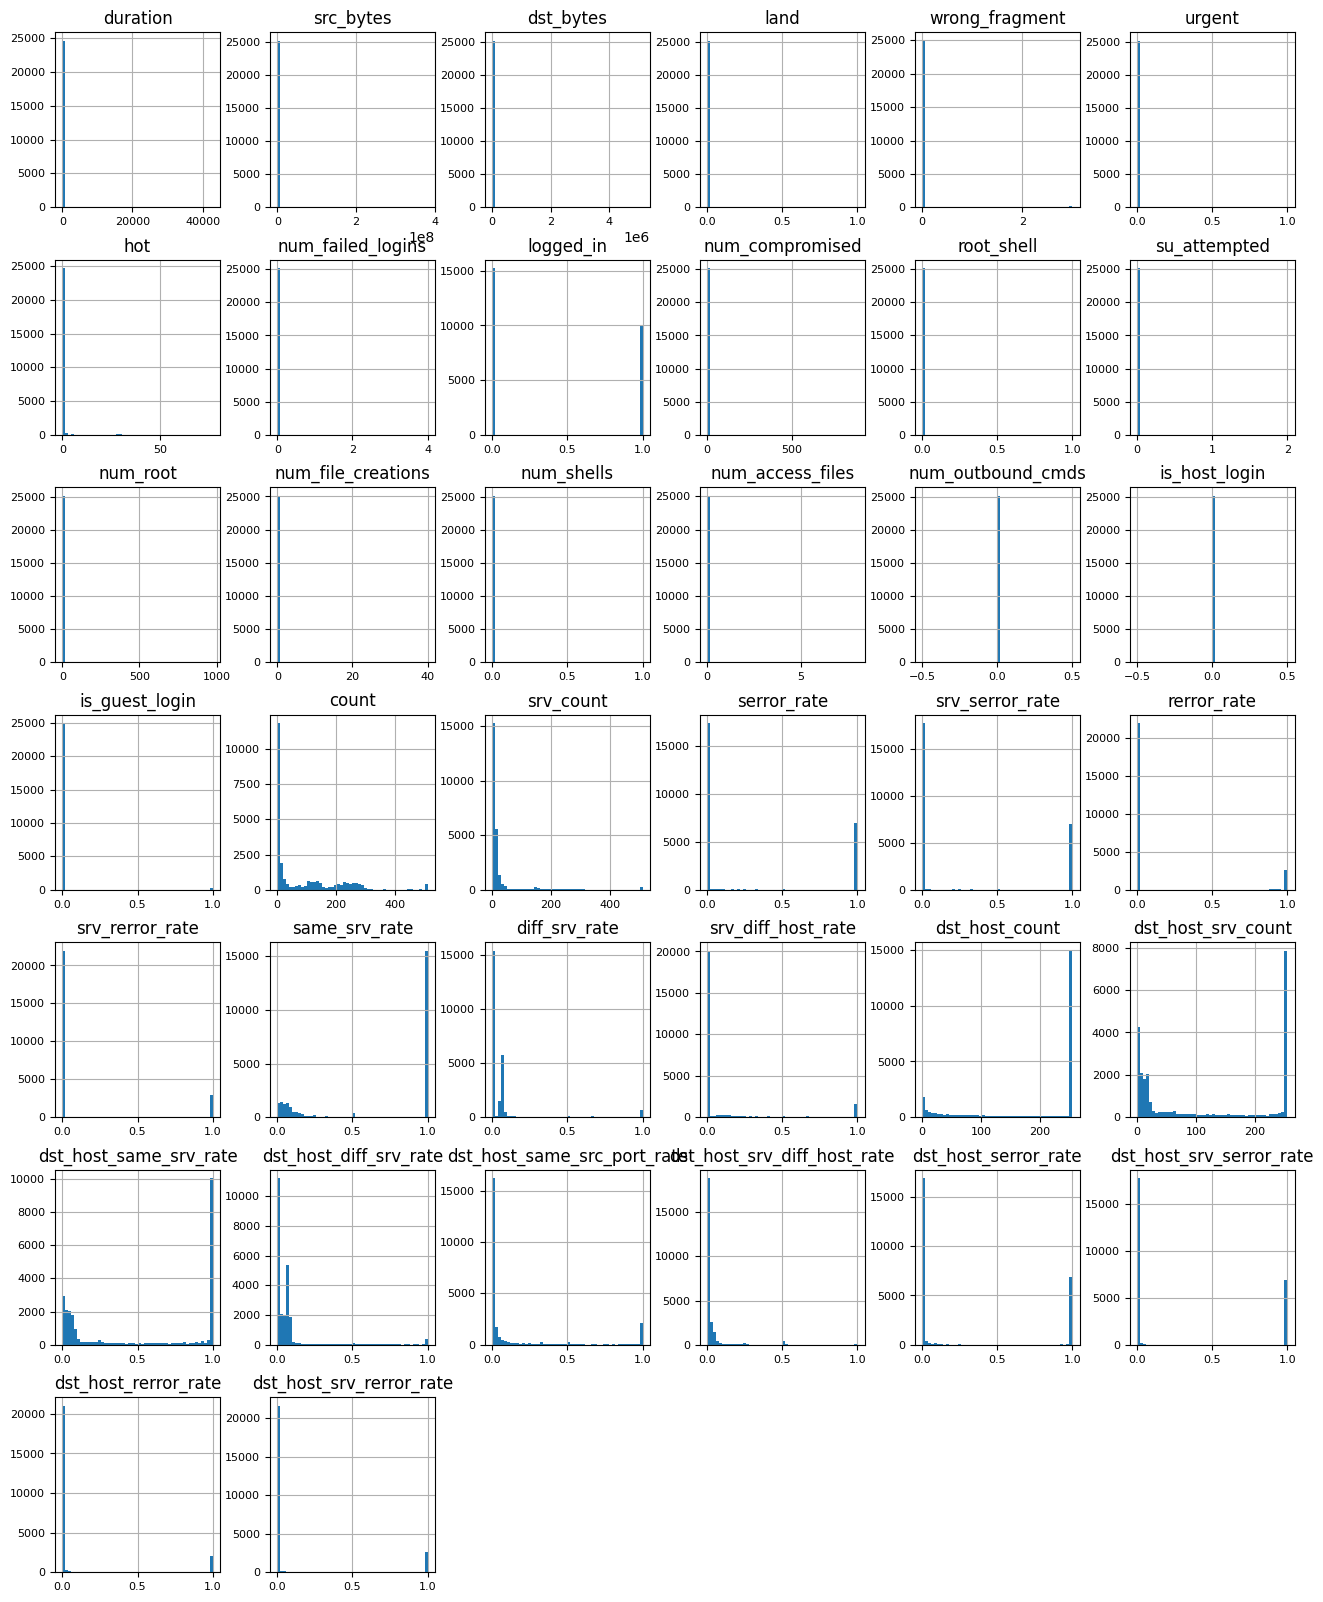

In [32]:
df_num2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

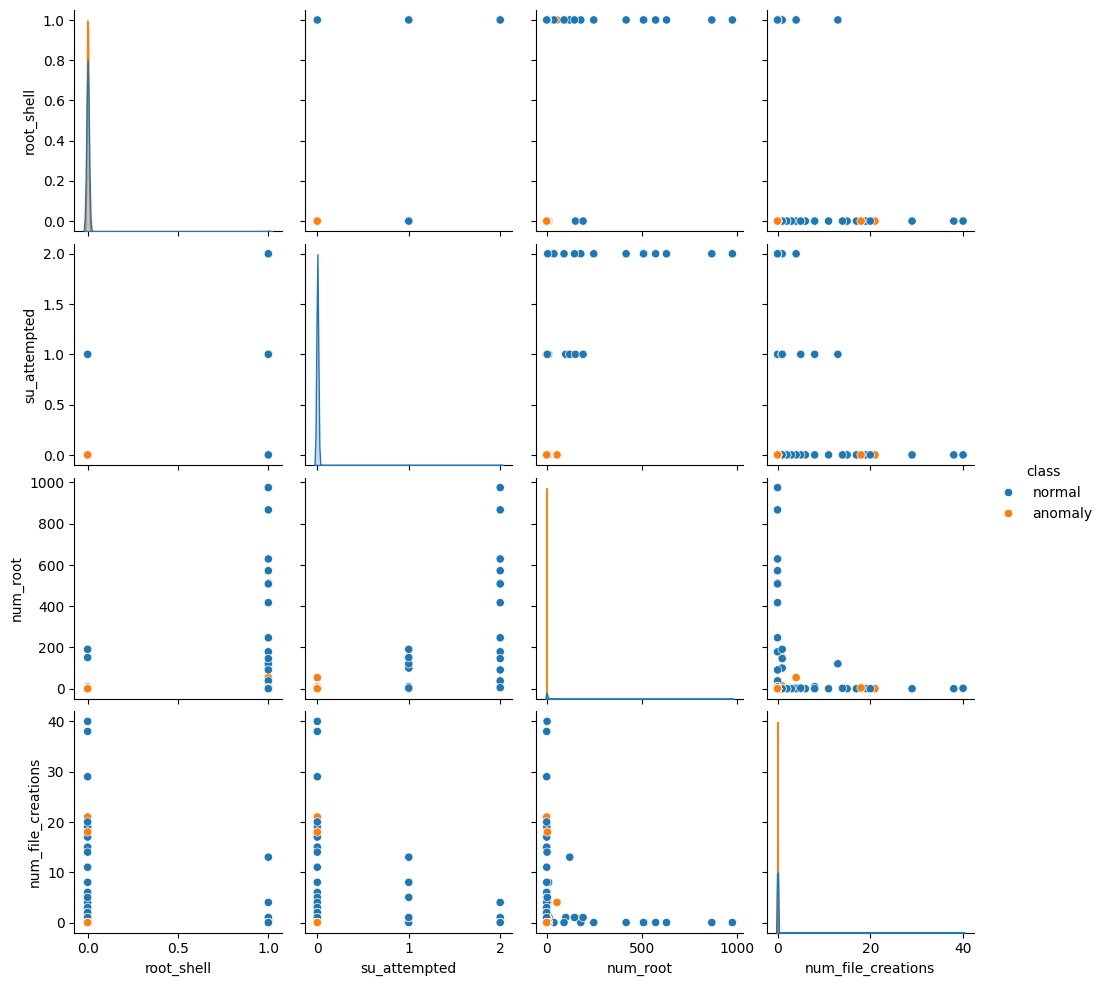

In [33]:
#sns.pairplot(df, hue='class', vars=['root_shell','su_attempted','num_root','num_file_creations'])
sns.pairplot(df4, hue='class', vars=['root_shell', 'su_attempted', 'num_root', 'num_file_creations'])

# Display the plot
plt.show()

In [34]:
from sklearn.manifold import TSNE
import pandas as pd

# ... your existing code to prepare temp_df ...
# Preparing dataset for tsne
frames = list()
for label in df['attack_cat'].unique():
    temp = df[df['attack_cat'] == label]
    if label == 'normal.' or label == 'neptune.':
        temp = temp.iloc[:10000, ]
    frames.append(temp)
temp_df = pd.concat(frames)

# Select only numerical columns for t-SNE
df_num = temp_df.select_dtypes(include=['float64', 'int64'])

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(df_num)



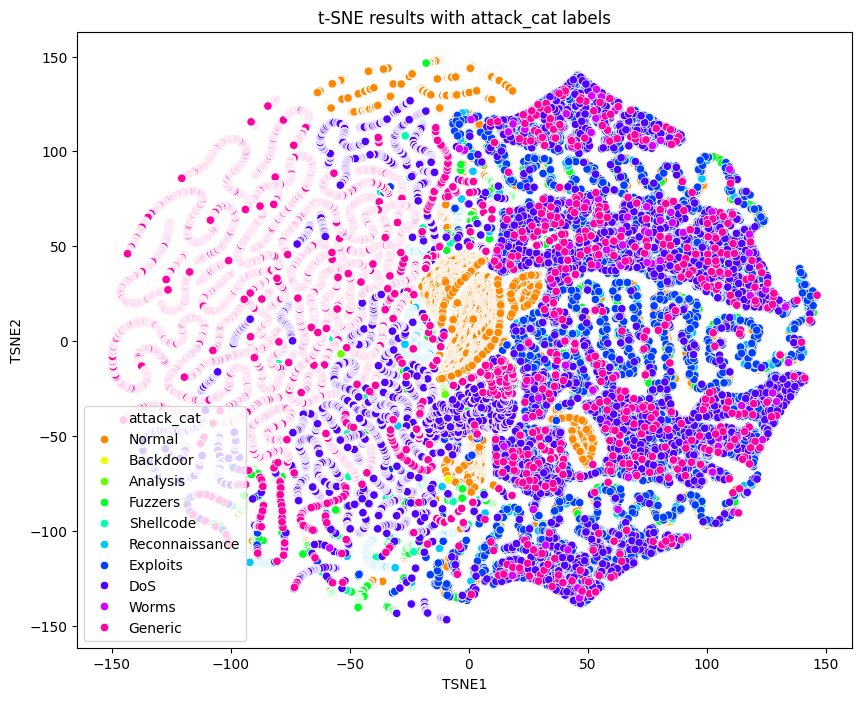

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a new DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['attack_cat'] = temp_df['attack_cat'].values  # assuming class information is retained
# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='attack_cat', data=tsne_df, palette=sns.color_palette("hsv", len(tsne_df['attack_cat'].unique())))
plt.title('t-SNE results with attack_cat labels')
plt.show()


In [36]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Check if 'Grade' column exists
if 'Grade' in df1.columns:
    # Preparing dataset for t-SNE
    frames = list()
    for label in df1['Grade'].unique():
        temp = df1[df1['Grade'] == label]
        frames.append(temp)
    temp_df = pd.concat(frames)

    # Select only numerical columns for t-SNE
    numerical_columns = ['Student_Age', 'Weekly_Study_Hours', 'Attendance']  # Add other numerical columns as needed
    df_num1 = temp_df[numerical_columns]
else:
    print("Column 'Grade' not found in df")

# Check for non-numeric columns
print("Non-numeric columns:", df_num1.select_dtypes(include=['object']).columns)
# You can either drop non-numeric columns or convert them to numeric if appropriate
# For example, to drop non-numeric columns:
df_num1 = df_num1.select_dtypes(include=['float64', 'int64'])
# Now apply StandardScaler
scaler = StandardScaler()
df_normalized1 = scaler.fit_transform(df_num1)
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(df_normalized1)





Non-numeric columns: Index(['Attendance'], dtype='object')


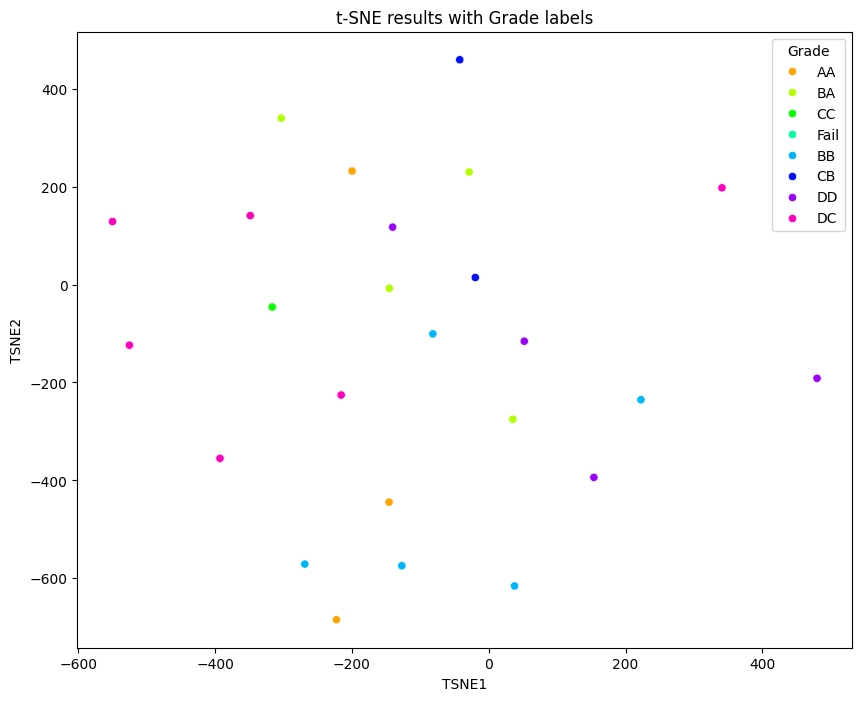

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a new DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Assuming you want to use 'Grade' as the categorical variable for coloring
# Ensure that 'Grade' is available in temp_df
tsne_df['Grade'] = temp_df['Grade'].values

# Plotting
plt.figure(figsize=(10, 8))
# Adjust the hue parameter to 'Grade' or any other categorical variable of interest
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Grade', data=tsne_df, palette=sns.color_palette("hsv", len(tsne_df['Grade'].unique())))

plt.title('t-SNE results with Grade labels')
plt.show()


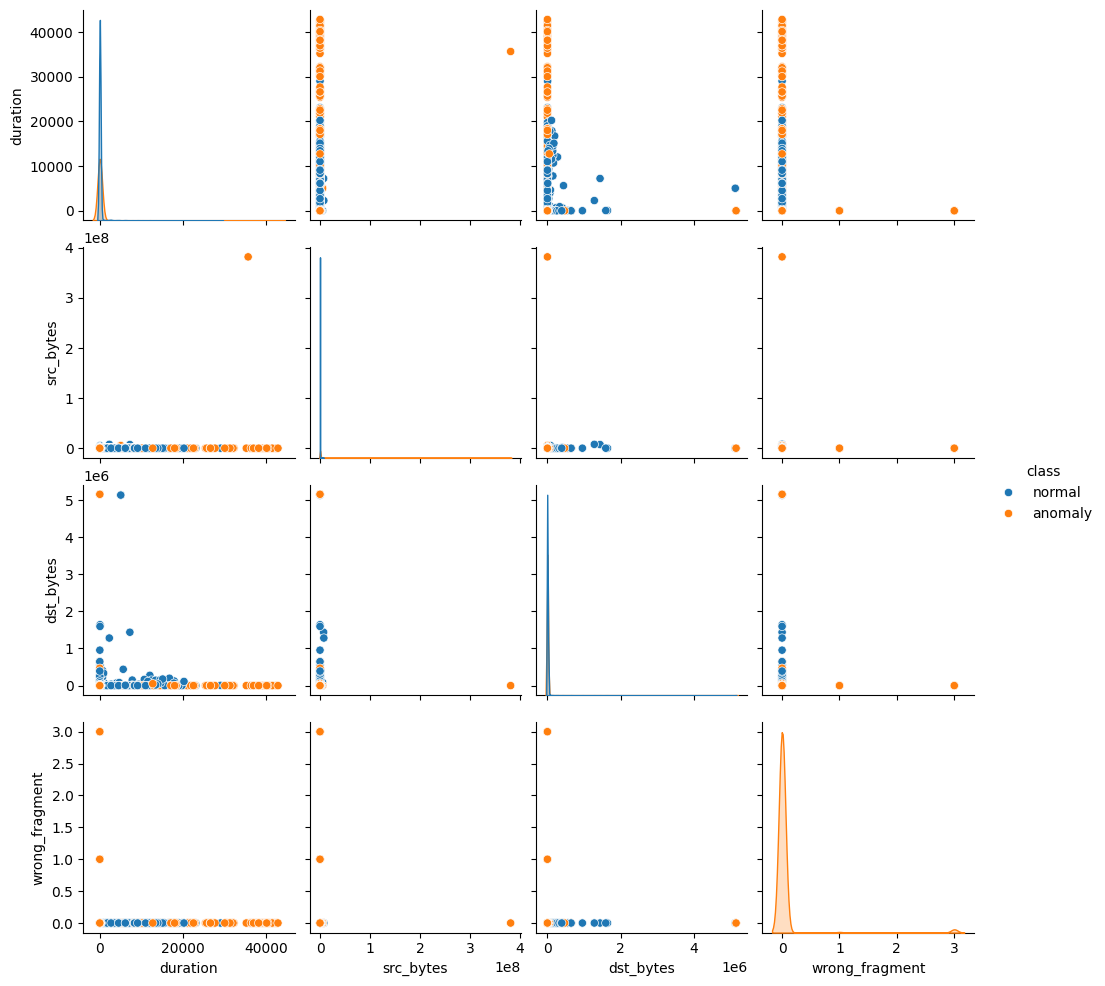

In [38]:
# Pair plots for bi-variate analyis
sns.pairplot(df4, hue='class', vars=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

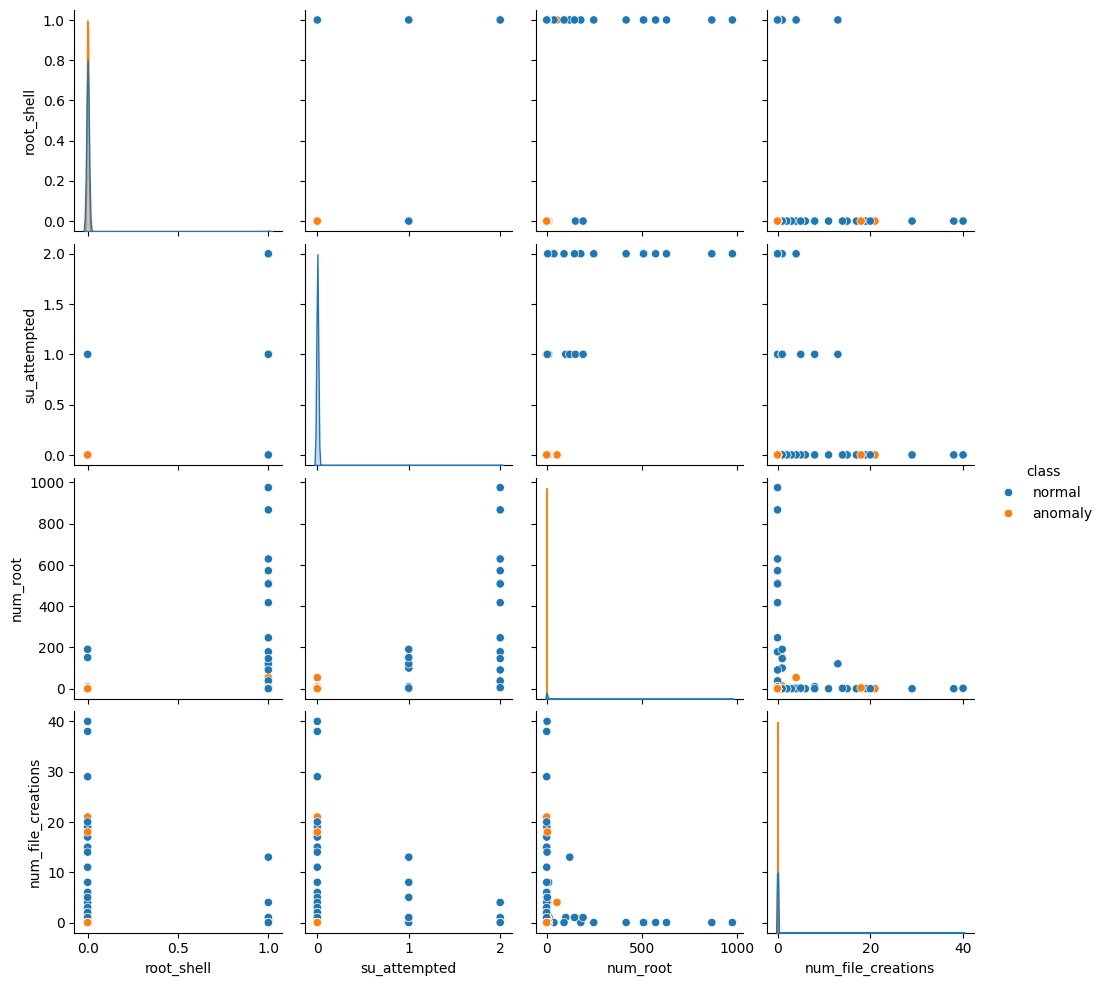

In [39]:
sns.pairplot(df4, hue='class', vars=['root_shell','su_attempted','num_root','num_file_creations'])

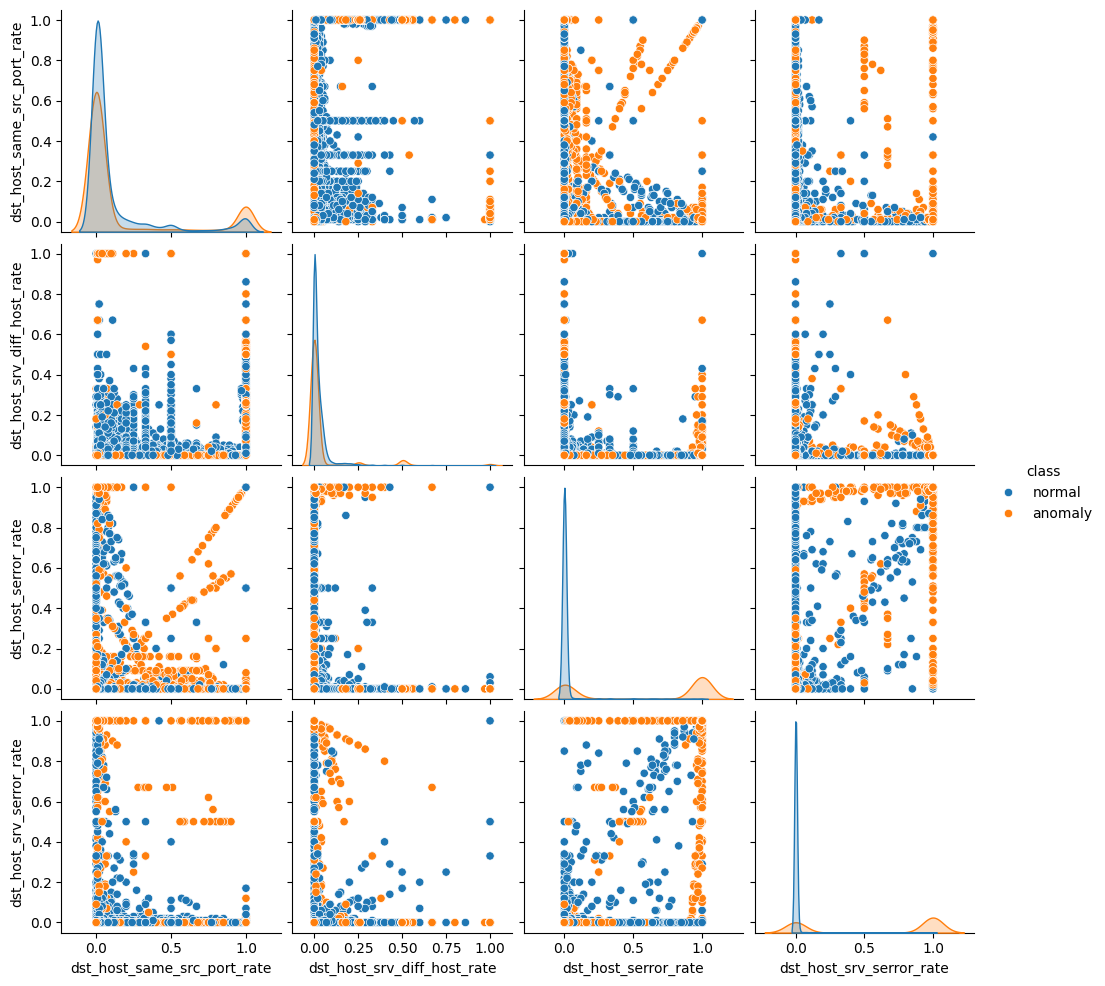

In [40]:
sns.pairplot(df4, hue='class', vars=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                             'dst_host_serror_rate','dst_host_srv_serror_rate'])

In [41]:
# t-sne -> Unsupervised non-linear dimensionality reduction and data visualization algorithm
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 1000)


# Preparing dataset for tsne
frames = list()
for label in df4['class'].unique():
    temp = df4[df4['class'] == label]
    if label == 'normal.' or label == 'neptune.':
        temp = temp.iloc[:10000, ]
    frames.append(temp)
temp_df = pd.concat(frames)

# Since t-sne works on numeric attributes only
df_num = temp_df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(25192, 38)

(25192, 2)


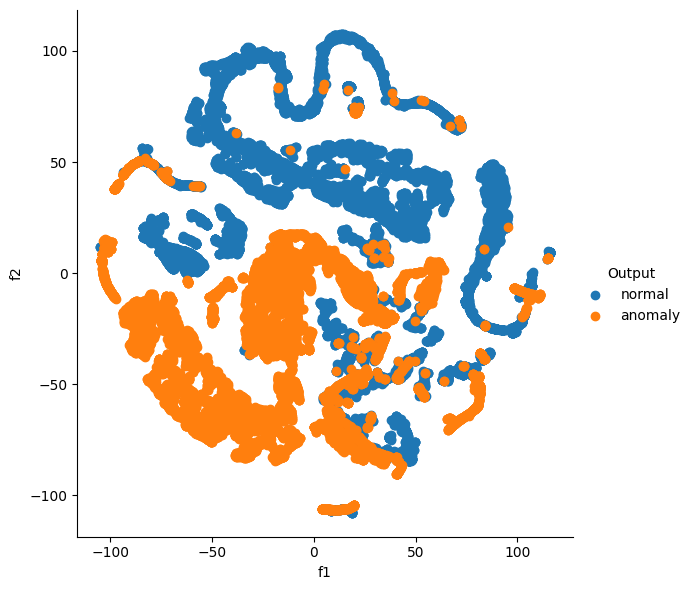

In [42]:
tsne_df = tsne.fit_transform(df_num)
print(tsne_df.shape)
tsne_df = np.vstack((tsne_df.T, temp_df['class'].values)).T
tsne_dataset = pd.DataFrame(data=tsne_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(tsne_dataset, hue='Output', height=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

In [ ]:
#Confusion Matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
# One-hot encoding for categorical variables
categorical_cols = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation']
df_encoded = pd.get_dummies(df1, columns=categorical_cols)

# Label encoding for the target variable if it's categorical
le = LabelEncoder()
df_encoded['Grade'] = le.fit_transform(df_encoded['Grade'])

# Feature Selection
X = df_encoded.drop(['Unnamed: 0', 'Id', 'Grade'], axis=1)
y = df_encoded['Grade']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Selection and Training
model = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence if needed
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Assuming 'Grade' has multiple classes, adjust the index and columns in cm_df accordingly
class_labels = le.classes_  # Or set your own labels based on the number of classes
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plotting the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()




In [ ]:
#ROC Curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Assuming df1 is your DataFrame
# Preprocessing: Convert categorical columns to numeric
df_encoded = pd.get_dummies(df1, columns=['Sex', 'High_School_Type', 'Transportation'])

# Binarize the multi-class labels for OvR approach
y = label_binarize(df_encoded['Grade'], classes=df_encoded['Grade'].unique())
n_classes = y.shape[1]

# Splitting the data
X = df_encoded.drop(['Unnamed: 0', 'Id', 'Grade'], axis=1)  # Features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a One-vs-Rest model
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    probabilities = model.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probabilities)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting ROC curve for each class
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic of class {i}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# PCA -> Unsupervised linear dimensionality reduction and data visualization algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
# Standardizing the data for PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.select_dtypes(include = ['float64', 'int64']))

pca_df = pca.fit_transform(X)
pca_df.shape

In [ ]:
pca_df = np.hstack((pca_df[:, :2], df['attack_cat'].values.reshape(-1, 1)))
pca_dataset = pd.DataFrame(data=pca_df, columns=['f1', 'f2', 'Output'])
sns.FacetGrid(pca_dataset, hue='Output', height=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

In [ ]:
df.info()
import pandas as pd
# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['proto'], df['attack_cat'])

# Display the crosstab result
print(crosstab_result)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Crosstab of proto vs attack_cat')
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['proto'], df['label'])

# Display the crosstab result
print(crosstab_result)

crosstab_result = pd.crosstab(df['state'], df['attack_cat'])
print(crosstab_result)


In [ ]:
#pd.crosstab(df['flag'], df['class'])
import pandas as pd

# Assuming df is your DataFrame
crosstab_result = pd.crosstab(df['state'], df['label'])

# Display the crosstab result
print(crosstab_result)
crosstab_result = pd.crosstab(df['service'], df['attack_cat'])



In [ ]:
target = []
for label in df['attack_cat'].values:
    if label == 'normal.':
        target.append(1)
    else:
        target.append(0)

In [ ]:
# Some utility functions

# train-test split function with stratify feature to maintain class distribution
def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])

    for class_name, val in df[stratify_col].value_counts().iteritems():
        class_samples_indices = df[df[stratify_col] == class_name].index.values

        class_test_indices = np.random.choice(class_samples_indices,
                            size = int(np.ceil(split * val)), replace = False)
        class_train_indices = np.setdiff1d(class_samples_indices, class_test_indices)

        test_indices = np.append(test_indices, class_test_indices)
        train_indices = np.append(train_indices, class_train_indices)

    print(test_indices.shape, train_indices.shape)
    x_train = df.iloc[train_indices, :-1]
    y_train = df.iloc[train_indices, -1]
    x_test = df.iloc[test_indices, :-1]
    y_test = df.iloc[test_indices, -1]

    return x_train, y_train, x_test, y_test
    # Prints confusion matrix and returns FP
from sklearn.metrics import confusion_matrix
def confusion_matrix(y_test, y_pred, model):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        # If it's normal and predicted as normal
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1

        # If it's bad and predicted as bad
        if y_test[i] == 0 and y_pred[i] == 0:
            tn += 1

        # If it's bad but predicted as normal
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1

        # If it's normal but predicted as bad
        if y_test[i] == 1 and y_pred[i] == 0:
            fn += 1

def custom_confusion_matrix(y_test, y_pred, model_name):
    matrix = sklearn_confusion_matrix(y_test, y_pred).ravel()
    tn, fp, fn, tp = matrix

    cm_df = pd.DataFrame([[tn, fp], [fn, tp]],
                         index=['Actual Negative', 'Actual Positive'],
                         columns=['Predicted Negative', 'Predicted Positive'])
    print(cm_df)

    # Plotting the heatmap
    labels = ['BAD', 'NORMAL']
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, annot_kws={"size": 12}, fmt='g',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(model_name)
    plt.show()

    return fp

# Accuracy calculation function
def accuracy(y_test, y_pred):
    return round(np.sum(y_test == y_pred) / y_test.shape[0] * 100, 2)

Gaussian Native Bayes

In [ ]:
# Preparing dataset for gaussian naive bayes
df_gnb = df.select_dtypes(include=['float64', 'int64'])
df_gnb.columns = df_gnb.columns.astype(str)

# Minimum percentage of variance we want to be described by the resulting transformed components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
var_threshold = 0.98  # This is an example value, adjust it as needed
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_gnb))
df_gnb = pd.DataFrame(num_features_transformed)
df_gnb['target'] = target

df_gnb.to_pickle('gnb_dataset.pkl')

var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)

df_gnb = pd.DataFrame(num_features_transformed)
df_gnb['target'] = target

df_gnb.to_pickle('gnb_dataset.pkl')

In [ ]:
class GNB:
    def __init__(self, prior=None, n_class=None, mean=None, variance = None, classes=None):
        self.prior = prior
        self.n_class = n_class
        self.mean = mean
        self.variance = variance
        self.classes = classes

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.mean = np.array(x.groupby(by=y).mean())
        self.variance = np.array(x.groupby(by=y).var())
        self.n_class = len(np.unique(self.y))
        self.classes = np.unique(self.y)
        self.prior = 1/self.n_class

    def calc_mean_var(self):
        m = np.array(self.mean)
        v = np.array(self.variance)

        self.mean_var = []
        for i in range(len(m)):
            m_row = m[i]
            v_row = v[i]
            for a, b in enumerate(m_row):
                mean = b
                var = v_row[a]
                self.mean_var.append([mean, var])
            return self.mean_var
    def split(self):
        spt = np.vsplit(np.array(self.calc_mean_var()), self.n_class)
        return spt

    def gnb_base(self, x_val, x_mean, x_var):
        self.x_val = x_val
        self.x_mean = x_mean
        self.x_var = x_var

        pi = np.pi
        equation_1 = 1/(np.sqrt(2 * pi * x_var))
        denom = 2 * x_var
        numerator = (x_val - x_mean) ** 2
        expo = np.exp(-(numerator/denom))
        prob = equation_1 * expo

        return prob

    def predict(self, X):
        self.X = X
        split_class = self.split()
        prob = []
        for i in range(self.n_class):
            class_one = split_class[i]
            for i in range(len(class_one)):
                class_one_x_mean = class_one[i][0]
                class_one_x_var = class_one[i][1]
                x_value = X[i]
                prob.append([self.gnb_base(x_value, class_one_x_mean, class_one_x_var)])
        prob_array = np.array(prob)
        prob_split = np.vsplit(prob_array, self.n_class)
        final_probabilities = []
        for i in prob_split:
            class_prob = np.prod(i) * self.prior
            final_probabilities.append(class_prob)

        maximum_prob = max(final_probabilities)
        prob_index = final_probabilities.index(maximum_prob)
        prediction = self.classes[prob_index]
        return prediction

Decision Tree

In [ ]:
print(df.columns)


In [ ]:
# Preparing dataset for decision tree

# Exclude 'label' if it's the original target, otherwise include it
df_dt = df[df.columns.difference(['label'])]  # Exclude 'label' if it was the original target
df_dt['target'] = target

# Save the DataFrame to a pickle file
df_dt.to_pickle('dt_dataset.pkl')



In [ ]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])

def class_counts(rows):
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns
    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column
        for val in values:  # for each value
            question = Question(col, val)

            true_rows, false_rows = partition(rows, question)

            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def build_tree(rows):
    gain, question = find_best_split(rows)
    if gain == 0:
        return Leaf(rows)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)

    return Decision_Node(question, true_branch, false_branch)

def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

XGBoost

In [ ]:
print(df.columns)

In [ ]:
# Preparing dataset for xgboost

df_xgb = df.select_dtypes(include = ['float64', 'int64'])
df_numerical = df.select_dtypes(include=['float64', 'int64'])
 #Minimum percentage of variance we want to be described by the resulting transformed components
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_numerical)
var_threshold = 0.98  # Adjust as per your requirement
pca_obj = PCA(n_components=var_threshold)
numerical_transformed = pca_obj.fit_transform(scaled_numerical)

#var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
numerical_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_numerical.values))


df_xgb = pd.DataFrame(num_features_transformed)

# Vectorizing Categorical features using one-hot encoding
# Categorical features in our dataset are -> 'class', 'service', and 'flag'

from sklearn.feature_extraction.text import CountVectorizer

# class
vocab = list(set(list(df['class'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
protocol_final = one_hot.fit_transform(df['class'].values)

# service
vocab = list(set(list(df['service'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
service_final = one_hot.fit_transform(df['service'].values)

# flag
vocab = list(set(list(df['flag'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
flag_final = one_hot.fit_transform(df['flag'].values)

# Merging categorical and numeric features
from scipy.sparse import hstack
df_xgb = hstack((df_xgb, protocol_final, service_final, flag_final))
df_xgb = pd.DataFrame(df_xgb.toarray())
df_xgb['target'] = target
df_xgb.to_pickle('xgb_dataset.pkl')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from scipy.sparse import hstack
import pandas as pd

# Preprocessing numerical features
df_numerical = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_numerical)

var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
numerical_transformed = pca_obj.fit_transform(scaled_numerical)

# Vectorizing categorical features using one-hot encoding
# Example for 'proto' and 'service'
one_hot_proto = OneHotEncoder()
proto_encoded = one_hot_proto.fit_transform(df[['proto']])

one_hot_service = OneHotEncoder()
service_encoded = one_hot_service.fit_transform(df[['service']])

# Merging categorical and numeric features
df_xgb = hstack((numerical_transformed, proto_encoded, service_encoded))

# Converting to DataFrame and adding the target variable
df_xgb = pd.DataFrame(df_xgb.toarray())
df_xgb['target'] = df['label']  # Replace 'label' with your actual target column name if different

# Saving the prepared dataset
df_xgb.to_pickle('xgb_dataset.pkl')



Model Training/ Testing

In [ ]:
from collections import defaultdict

results = defaultdict(list)

In [ ]:
df = pd.read_pickle('gnb_dataset.pkl')

x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

gaussian_classifier = GNB()
gaussian_classifier.fit(x_train, y_train)
preds = []
for test in x_test.values:
    preds.append(gaussian_classifier.predict(test))
y_pred = np.array(preds)

acc = accuracy(y_test.values, y_pred)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, y_pred, "Gaussian Naive Bayes")

# Results
results['Gaussian Naive Bayes'] = [acc, fp]


In [ ]:
df = pd.read_pickle('dt_dataset.pkl')
df = df.sample(frac=1).reset_index(drop=True)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
split_index = int(np.ceil(.80 * df.shape[0]))
training_data = df.iloc[:split_index, :].values.tolist()
testing_data = df.iloc[split_index:, :].values.tolist()

# As training on large dataset takes time, thus reducing the training set
training_data = df.iloc[:10000, :].values.tolist()
testing_data = df.iloc[int(np.ceil(.80 * df.shape[0])):, :].values.tolist()

my_tree = build_tree(training_data)

actual, predicted = [], []
for row in testing_data:
    actual.append(row[-1])
    predicted.append(sorted(classify(row, my_tree).items(), key = lambda x: x[1], reverse = True)[0][0])

acc = accuracy(np.array(actual), np.array(predicted))
print(f"Accuracy: {acc}%")

fp = confusion_matrix(np.array(actual), np.array(predicted), "Decision Tree")

# Results
results['Decision Tree'] = [acc, fp]

In [ ]:
from xgboost import XGBClassifier
df = pd.read_pickle('xgb_dataset.pkl')
x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = accuracy(y_test.values, y_pred)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, y_pred, "XGBoost")

# Results
results['XGBoost'] = [acc, fp]

In [ ]:
# Vote from GNB
df = pd.read_pickle('gnb_dataset.pkl')
preds = []
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
for test in test_set.values:
    preds.append(gaussian_classifier.predict(test))
gnb_preds = np.array(preds)

# Vote from DT
df = pd.read_pickle('dt_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :].values.tolist()
predicted = []
for row in test_set:
    predicted.append(sorted(classify(row, my_tree).items(), key = lambda x: x[1], reverse = True)[0][0])
dt_preds = np.array(predicted)

# Vote from XGBoost
df = pd.read_pickle('xgb_dataset.pkl')
test_set = df.iloc[int(np.ceil(.80 * df.shape[0])):, :-1]
xgb_preds = model.predict(test_set)

# Max-voting ensemble technique
y_test_pred_maxvote = []
for tup in list(zip(gnb_preds, dt_preds, xgb_preds)):
    y_test_pred_maxvote.append(np.bincount(tup).argmax())
max_vote_preds = np.array(y_test_pred_maxvote)
# Evaluation
y_test = df.iloc[int(np.ceil(.80 * df.shape[0])):, -1]

acc = accuracy(y_test.values, max_vote_preds)
print(f"Accuracy: {acc}%")

fp = confusion_matrix(y_test.values, max_vote_preds, "Max Voting Technique")

# Results
results['Max Voting Technique'] = [acc, fp]

In [ ]:
# Results
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Technique", "Accuracy", "False Positives"]
x.add_row(['Gaussian Naive Bayes'] + results['Gaussian Naive Bayes'])
x.add_row(['Decision Tree']  + results['Decision Tree'])
x.add_row(['XGBoost'] + results['XGBoost'])
x.add_row(['Max Voting Technique'] + results['Max Voting Technique'])
print(x)

In [ ]:
models = ['model1', 'model2', 'model3']
for name in models:
    for scorer in ['precision','recall']:
        scores = {
    'model1': {'precision': [0.8, 0.82, 0.81], 'recall': [0.75, 0.77, 0.76]},
    'model2': {'precision': [0.85, 0.87, 0.86], 'recall': [0.80, 0.82, 0.81]},
    'model3': {'precision': [0.78, 0.79, 0.77], 'recall': [0.74, 0.76, 0.75]}
        }

for name in scores:
  for scorer in ['precision', 'recall']:
    scores[name][scorer] = sum(scores[name][scorer]) / len(scores[name][scorer])

# Convert to DataFrame and plot
scores_df = pd.DataFrame(scores).swapaxes("index", "columns") * 100
scores_df.plot(kind="bar", ylim=[80, 100], figsize=(24, 6), rot=0)
plt.show()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to tokenize data
def tokenize_data(texts, labels, tokenizer, max_length=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        # Convert non-string text to string
        if not isinstance(text, str):
            text = str(text)

        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf',
            truncation=True
        )

        input_ids.append(encoded_dict['input_ids'][0])
        attention_masks.append(encoded_dict['attention_mask'][0])

    return input_ids, attention_masks, labels

# Mount Google Drive (specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
train_file_name = 'drive/MyDrive/UNSW_NB15_training-set.csv'
test_file_name = 'drive/MyDrive/UNSW_NB15_testing-set.csv'

train_df = pd.read_csv(train_file_name)
test_df = pd.read_csv(test_file_name)

# Extract and tokenize texts and labels
train_texts = train_df.iloc[:, -1].tolist()
train_labels = train_df.iloc[:, -2].tolist()
test_texts = test_df.iloc[:, -1].tolist()
test_labels = test_df.iloc[:, -2].tolist()

train_input_ids, train_attention_masks, train_labels_encoded = tokenize_data(train_texts, train_labels, tokenizer)
test_input_ids, test_attention_masks, test_labels_encoded = tokenize_data(test_texts, test_labels, tokenizer)

# Rest of your code goes here...

# Initialize the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Mount Google Drive (specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
train_file_name = 'drive/MyDrive/UNSW_NB15_training-set.csv'
test_file_name = 'drive/MyDrive/UNSW_NB15_testing-set.csv'  # Make sure this points to the correct test file

train_df = pd.read_csv(train_file_name)
test_df = pd.read_csv(test_file_name)


# Extract and tokenize texts and labels
train_texts = train_df.iloc[:, -1].tolist()
train_labels = train_df.iloc[:, -2].tolist()
test_texts = test_df.iloc[:, -1].tolist()
test_labels = test_df.iloc[:, -2].tolist()

train_input_ids, train_attention_masks, train_labels_encoded = tokenize_data(train_texts, train_labels, tokenizer)
test_input_ids, test_attention_masks, test_labels_encoded = tokenize_data(test_texts, test_labels, tokenizer)

# Prepare TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_input_ids, 'attention_mask': train_attention_masks},
    train_labels_encoded
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_input_ids, 'attention_mask': test_attention_masks},
    test_labels_encoded
))

# Define batch size
BATCH_SIZE = 16

# Shuffle and batch datasets
train_dataset = train_dataset.shuffle(10000).batch(BATCH_SIZE, drop_remainder=True)
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True)

# Define the model architecture
def build_model():
    input_ids = tf.keras.layers.Input(shape=(512,), dtype='int32', name='input_ids')
    attention_masks = tf.keras.layers.Input(shape=(512,), dtype='int32', name='attention_mask')

    distilbert_output = distilbert_model(input_ids, attention_mask=attention_masks)[0]
    cls_token = distilbert_output[:, 0, :]

    x = tf.keras.layers.Dense(128, activation='relu')(cls_token)
    x = tf.keras.layers.Dropout(0.1)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)
    return model

def tokenize_data(texts, labels, tokenizer, max_length=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        # Convert non-string text to string
        if not isinstance(text, str):
            text = str(text)

        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf',
            truncation=True
        )

        input_ids.append(encoded_dict['input_ids'][0])
        attention_masks.append(encoded_dict['attention_mask'][0])

    return input_ids, attention_masks, labels

# Tokenize your data
train_input_ids, train_attention_masks, train_labels_encoded = tokenize_data(train_texts, train_labels, tokenizer)
test_input_ids, test_attention_masks, test_labels_encoded = tokenize_data(test_texts, test_labels, tokenizer)

model = build_model()




In [ ]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_data(texts, labels, tokenizer, max_length=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        if not isinstance(text, str):
            text = str(text)
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf',
            truncation=True
        )
        input_ids.append(encoded_dict['input_ids'][0])
        attention_masks.append(encoded_dict['attention_mask'][0])

    return input_ids, attention_masks, labels


In [ ]:
# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
#model.summary()

#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
#checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# Train the model
#history = model.fit(
#    train_dataset,
#    validation_data=test_dataset,
#    epochs=3,
#    callbacks=[early_stop, checkpoint]
#)

# Evaluate and save the model
#model.evaluate(test_dataset)
#model.save('my_distilbert_model')
from transformers import TFDistilBertModel, DistilBertConfig
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

# Assuming 'input_ids' and 'attention_mask' are your input features
input_ids = Input(shape=(512,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(512,), dtype=tf.int32, name='attention_mask')

config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
distilbert = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

sequence_output = distilbert(input_ids, attention_mask=attention_mask)[0]
cls_token = sequence_output[:, 0, :]
x = Dense(128, activation='relu')(cls_token)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.save('saved_models/my_distilbert_model')

In [ ]:
model.save('my_distilbert_model', save_format='tf')
!ls -l my_distilbert_model
import os

# Define the directory path
directory_path = "saved_models/my_distilbert_model/1/"

# Create the directory (including intermediate directories)
try:
    os.makedirs(directory_path, exist_ok=True)
    print(f"Directory '{directory_path}' created successfully.")
except OSError as error:
    print(f"Error creating directory '{directory_path}': {error}")


In [ ]:
import shutil
import os

# Define the source and destination paths
source_path = 'my_distilbert_model/saved_model.pb'
destination_path = 'saved_models/my_distilbert_model/1/saved_model.pb'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Move the file
try:
    shutil.move(source_path, destination_path)
    print(f"File moved successfully from '{source_path}' to '{destination_path}'.")
except IOError as e:
    print(f"Unable to move file. {e}")


In [ ]:
import os

# Define the directory path
directory_path = 'saved_models/my_distilbert_model/1/'

# List the contents of the directory
try:
    files = os.listdir(directory_path)
    print("Directory contents:")
    for file in files:
        print(file)
except OSError as error:
    print(f"Error accessing directory '{directory_path}': {error}")


In [ ]:
import shutil
from google.colab import files

# Path of the directory to be zipped
dir_to_zip = 'my_distilbert_model'

# Output zip file name
zip_file = 'my_distilbert_model.zip'

# Create a zip file from the directory
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', dir_to_zip)

# Download the zip file
files.download(zip_file)


In [ ]:
!apt-get update


In [ ]:
!curl -sL https://aka.ms/InstallAzureCLIDeb | bash


In [ ]:
!az --version


In [ ]:
!pip install azure-storage-blob

import os
os.environ['AZURE_STORAGE_CONNECTION_STRING'] = 'DefaultEndpointsProtocol=https;AccountName=idsstoragearya;AccountKey=ha3hzLGx/lPuVWSujLuLoH97laDqs5U+3TXY9KH6gwZwyuSaXtXdzzWCXLy867TIWYnfT2hhLhlJ+AStPDKhig==;EndpointSuffix=core.windows.net'





In [ ]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')
if not connect_str:
    print("Azure Storage connection string not found in environment variables")
else:
    print("Azure Storage connection string found.")

# Proceed with your code if the connection string is found


In [ ]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import os


In [ ]:
connect_str = 'DefaultEndpointsProtocol=https;AccountName=idsstoragearya;AccountKey=ha3hzLGx/lPuVWSujLuLoH97laDqs5U+3TXY9KH6gwZwyuSaXtXdzzWCXLy867TIWYnfT2hhLhlJ+AStPDKhig==;EndpointSuffix=core.windows.net'
container_name = 'idsstoragearya'  # The name of the blob container where you want to upload the model


In [ ]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)


In [ ]:
import shutil

model_dir = 'saved_models/my_distilbert_model'  # Path to your model directory
output_filename = 'model'  # Output filename without extension

# Create a zip file (e.g., model.zip) containing the contents of the model directory
shutil.make_archive(output_filename, 'zip', model_dir)


In [ ]:
# Define the path to the zipped file and the desired blob name
local_zipfile_path = f'{output_filename}.zip'
blob_name = 'my_distilbert_model.zip'  # Name of the blob in Azure Blob Storage

# Get a blob client using the local zip file name
blob_client = blob_service_client.get_blob_client(container='idssystemcontainer', blob='blob_name')

# Upload the zipped file
with open(local_zipfile_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)
